# SI 618 - Homework #4: Visualization, Correlation, and Linear Models

Version 2022.02.07.1.CT

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.patches as mpatches

In [61]:
warnings.filterwarnings('ignore')

In [62]:
MY_UNIQNAME = 'yjwoo'

## We will be using two different datasets for the two different parts of this homework. Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### <span style="color:magenta">  Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes for </span>

* Plot histograms for these metrics *for Canada*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for Canada*, as we did in this week's class. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [63]:
df_youtube_canada = pd.read_csv("./data/CAvideos.csv")

In [64]:
df_youtube_canada.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [65]:
df_youtube_canada.shape

(40881, 16)

The youtube_canada data consists of a total of 40881 rows and 16 columns.

In [66]:
df_youtube_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

You can check that there are no missing values ​​except for the description column.

#### Views

In [67]:
df_youtube_canada["views"].describe()

count    4.088100e+04
mean     1.147036e+06
std      3.390913e+06
min      7.330000e+02
25%      1.439020e+05
50%      3.712040e+05
75%      9.633020e+05
max      1.378431e+08
Name: views, dtype: float64

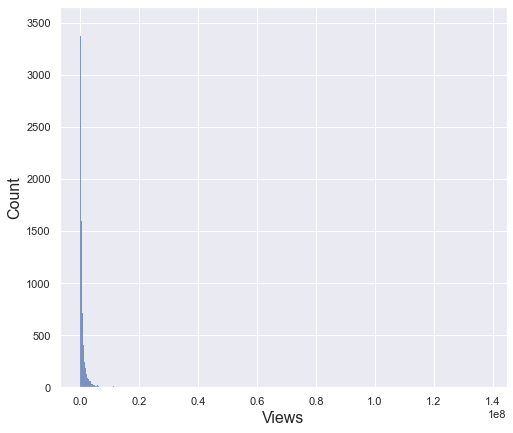

In [68]:
sns.set(style = "darkgrid")
plt.figure(figsize = (8, 7))

sns.histplot(x = df_youtube_canada["views"])
plt.xlabel("Views", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

The view column has a very large deviation with a minimum value of 733 and a maximum value of 130 million. Therefore, the standard deviation is also very large of 3.3 million. For this reason, even if you draw a histogram, you cannot check the distribution properly as above. To see the distribution in more detail, let's check only the data within the 95% percentile

In [70]:
percentile_95_views = np.percentile(df_youtube_canada["views"], 95)
percentile_95_views

4090835.0

95% percentile of views column is about 4 million

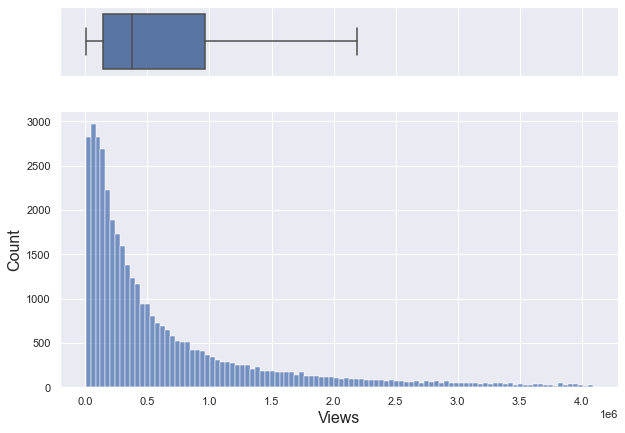

In [71]:
sns.set(style="darkgrid")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.2, .8)}, figsize = (10, 7))

sns.boxplot(x = df_youtube_canada.views, ax = ax_box, showfliers = False)
sns.histplot(x = df_youtube_canada[df_youtube_canada["views"] <= percentile_95_views].views, ax = ax_hist)

plt.xlabel("Views", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
ax_box.set_xlabel("")

plt.show()

If you only look at data below 95% percentile, it is a right-skewed graph with a median of about 370,000.

In [13]:
np.log(df_youtube_canada["views"]).describe()

count    40881.000000
mean        12.810707
std          1.508807
min          6.597146
25%         11.876888
50%         12.824507
75%         13.778122
max         18.741627
Name: views, dtype: float64

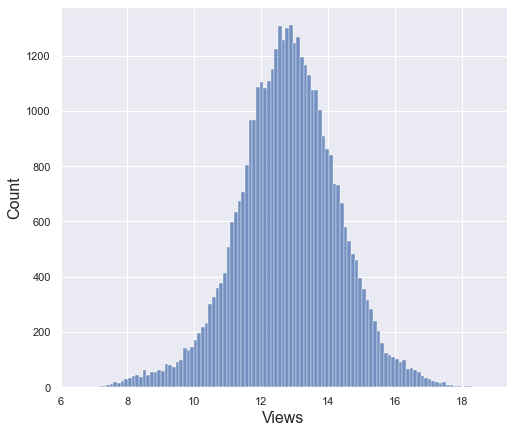

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 7))

sns.histplot(x = np.log(df_youtube_canada["views"]))
plt.xlabel("Views", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

After log transformation, it seems to follow a normal distribution with some bell shape. However, since it is not possible to judge only by the shape of histogram, let's check the lag plot, QQplot, and run sequence plot together.

In [81]:
def checkPlots(data, column, isLogTransform):
    
    if isLogTransform:
        series = np.log(data[column])
    
    else:
        series = data[column]

    fig, axs = plt.subplots(2, 2, figsize = (15, 10))
    plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 1.0)

    # Histogram
    ax = sns.histplot(series, ax = axs[0, 0])
    if isLogTransform:
        ax.set_xlabel(f"log({column})", fontsize = 12)
        ax.set_title("Histogram", fontsize = 16)
    else:
        ax.set_xlabel(column, fontsize = 12)
    ax.set_ylabel("Count", fontsize = 12)
    ax.set_title("Histogram", fontsize = 16)

    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(x = current, y = lag, fit_reg = False, ax = axs[0,1])
    ax.set_ylabel("y_i-1", fontsize = 12)
    ax.set_xlabel("y_i", fontsize = 12)
    ax.set_title("Lag plot", fontsize = 16)

    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    ax = sns.regplot(x = xr, y = qntls, ax = axs[1,0])
    ax.set_title("QQ plot", fontsize = 16)

    # Run sequence
    ax = sns.regplot(x = np.arange(len(series)),y = series, ax = axs[1,1])
    ax.set_ylabel("val", fontsize = 12)
    ax.set_xlabel("i", fontsize = 12)
    ax.set_title("Run sequence plot", fontsize = 16)
    
    plt.tight_layout()
    plt.show()

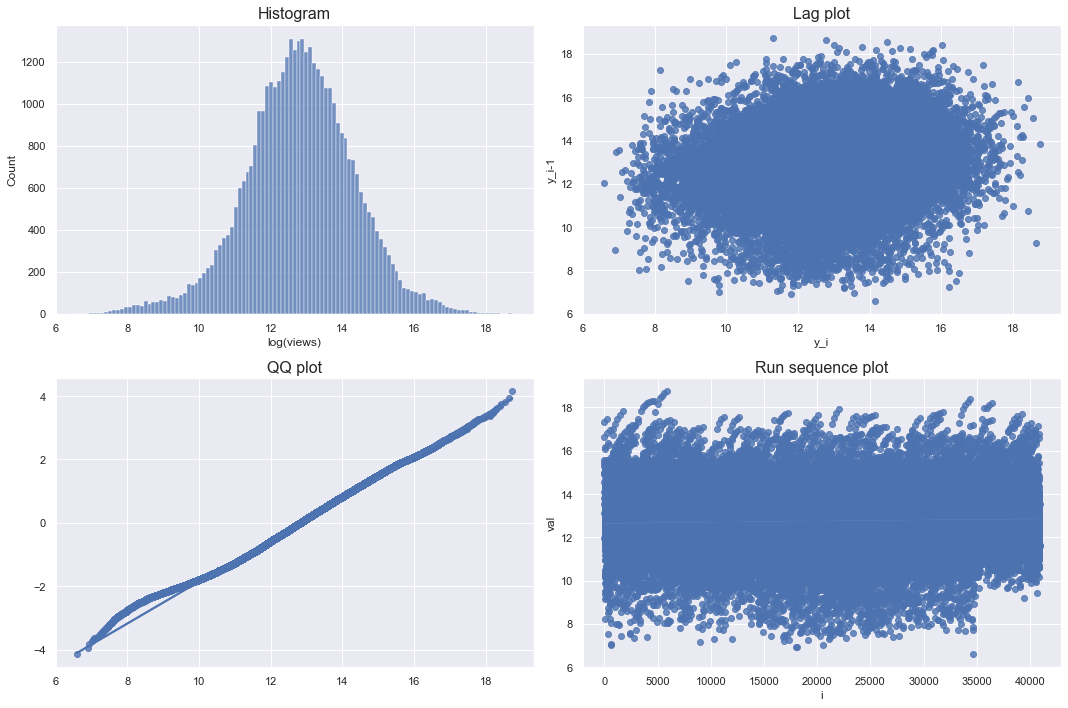

In [82]:
checkPlots(data = df_youtube_canada, column = "views", isLogTransform = True)

The lag plot and run sequence plot should not show a certain pattern, and the qq plot means that the more points on the diagonal, the closer to the bell shape. Since the log transformation of views satisfies all of these conditions, it can be seen that it is close to a normal distribution.
 

#### Likes

In [17]:
df_youtube_canada["likes"].describe()

count    4.088100e+04
mean     3.958269e+04
std      1.326895e+05
min      0.000000e+00
25%      2.191000e+03
50%      8.780000e+03
75%      2.871700e+04
max      5.053338e+06
Name: likes, dtype: float64

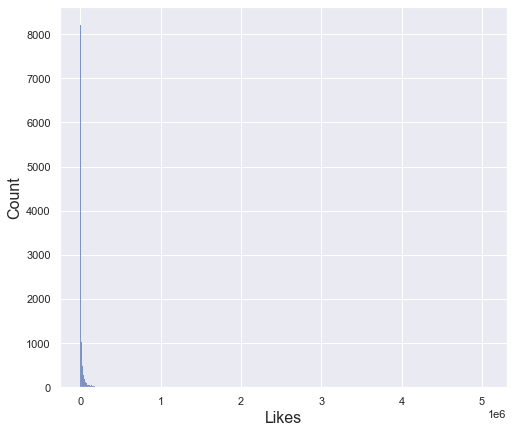

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 7))

sns.histplot(x = df_youtube_canada["likes"])
plt.xlabel("Likes", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

The likes column has a very large deviation with a minimum value of 0 and a maximum value of 5 million. Therefore, the standard deviation is also very large of one hundred thirty-five thousand. For this reason, even if you draw a histogram, you cannot check the distribution properly as above. To see the distribution in more detail, let's check only the data within the 95% percentile

In [84]:
percentile_95_likes = np.percentile(df_youtube_canada["likes"], 95)
percentile_95_likes

165252.0

95% percentile of likes column is about one hundred sixty-five thousand.

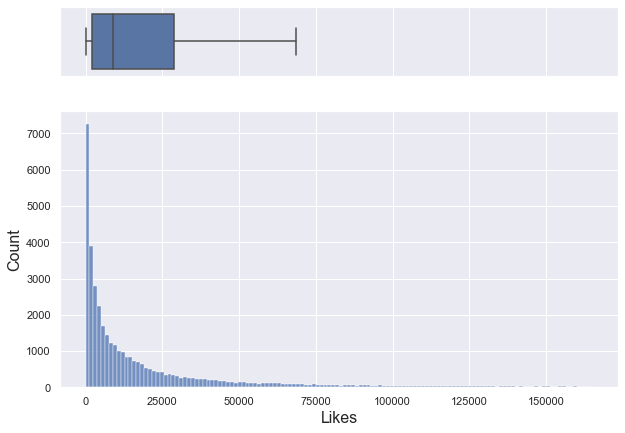

In [85]:
sns.set(style="darkgrid")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.2, .8)}, figsize = (10, 7))

sns.boxplot(x = df_youtube_canada.likes, ax = ax_box, showfliers = False)
sns.histplot(x = df_youtube_canada[df_youtube_canada["likes"] <= percentile_95_likes].likes, ax = ax_hist)

plt.xlabel("Likes", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
ax_box.set_xlabel("")

plt.show()

If you only look at data below 95% percentile, it is a right-skewed graph with a median of about 8,780.

In [86]:
np.log(df_youtube_canada[df_youtube_canada["likes"] > 0].likes).describe()

count    40597.000000
mean         8.951208
std          1.969017
min          0.000000
25%          7.727535
50%          9.095154
75%         10.275051
max         15.435560
Name: likes, dtype: float64

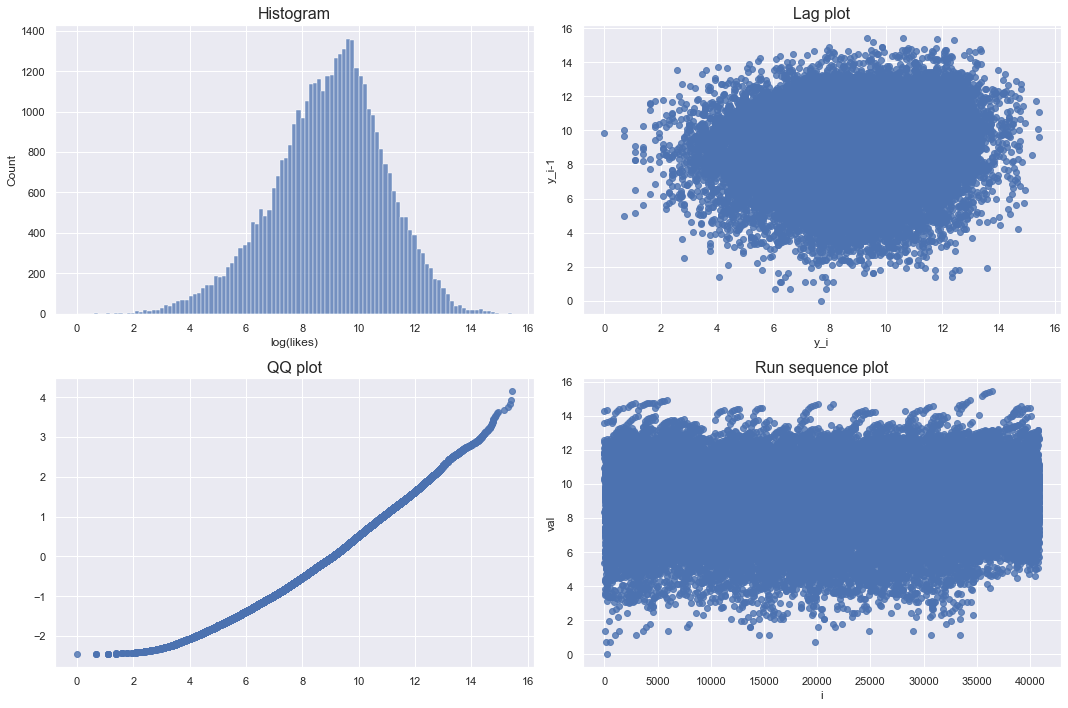

In [87]:
checkPlots(data = df_youtube_canada, column = "likes", isLogTransform = True)

Looking at the log-transformed graph, the lag plot and run sequence plot do not show any pattern. Although the qq plot deviated a little from the diagonal, it can be seen that it is almost like a bell shape. Therefore, the log-transformed likes approximates the normal distribution.


#### Dislikes

In [23]:
df_youtube_canada["dislikes"].describe()

count    4.088100e+04
mean     2.009195e+03
std      1.900837e+04
min      0.000000e+00
25%      9.900000e+01
50%      3.030000e+02
75%      9.500000e+02
max      1.602383e+06
Name: dislikes, dtype: float64

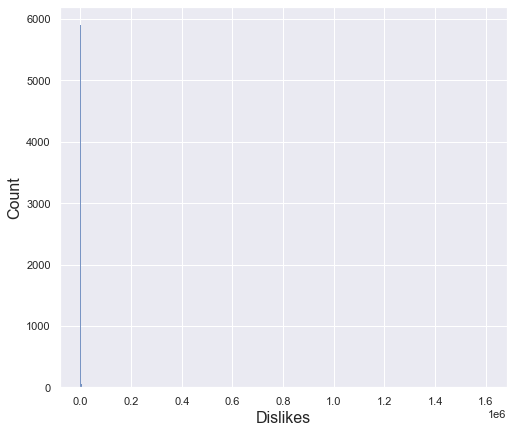

In [24]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 7))

sns.histplot(x = df_youtube_canada["dislikes"])
plt.xlabel("Dislikes", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

The dislikes column has a very large deviation with a minimum value of 0 and a maximum value of about 1,600,000. Therefore, the standard deviation is also very large of 19,000. For this reason, even if you draw a histogram, you cannot check the distribution properly as above. To see the distribution in more detail, let's check only the data within the 95% percentile.

In [89]:
percentile_95_dislikes = np.percentile(df_youtube_canada["dislikes"], 95)
percentile_95_dislikes

6479.0

95% percentile of likes column is 6,479.

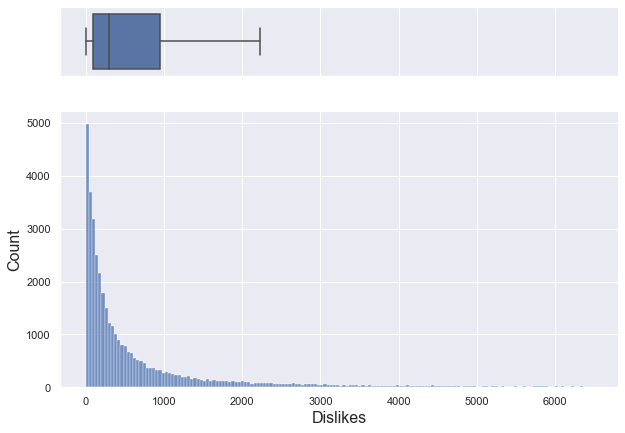

In [90]:
sns.set(style="darkgrid")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.2, .8)}, figsize = (10, 7))

sns.boxplot(x = df_youtube_canada.dislikes, ax = ax_box, showfliers = False)
sns.histplot(x = df_youtube_canada[df_youtube_canada["dislikes"] <= percentile_95_dislikes].dislikes, ax = ax_hist)

plt.xlabel("Dislikes", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
ax_box.set_xlabel("")

plt.show()

If you only look at data below 95% percentile, it is a right-skewed graph with a median of about 303.

In [91]:
np.log(df_youtube_canada[df_youtube_canada["dislikes"] > 0].dislikes).describe()

count    40488.000000
mean         5.761168
std          1.796411
min          0.000000
25%          4.634729
50%          5.733341
75%          6.870313
max         14.287002
Name: dislikes, dtype: float64

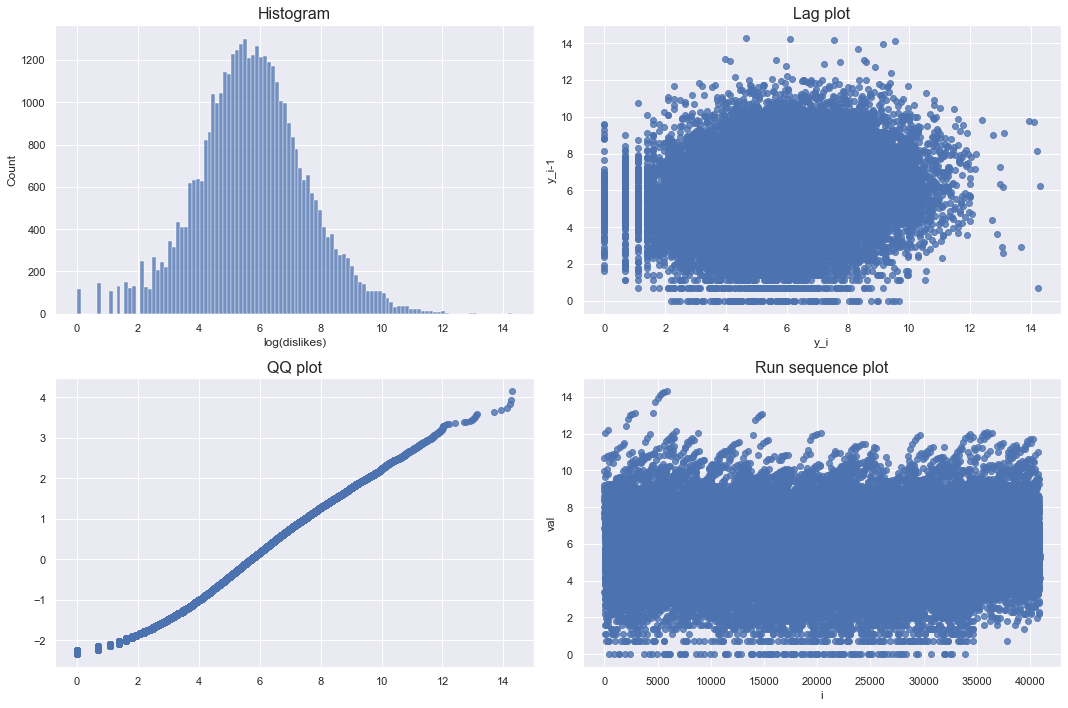

In [92]:
checkPlots(data = df_youtube_canada, column = "dislikes", isLogTransform = True)

Looking at the log-transformed graph, the lag plot and run sequence plot do not show any pattern. Also, qqplot is almost diagonal. Therefore, the log-transformed dislikes approximates the normal distribution.

#### Comment counts

In [93]:
df_youtube_canada["comment_count"].describe()

count    4.088100e+04
mean     5.042975e+03
std      2.157902e+04
min      0.000000e+00
25%      4.170000e+02
50%      1.301000e+03
75%      3.713000e+03
max      1.114800e+06
Name: comment_count, dtype: float64

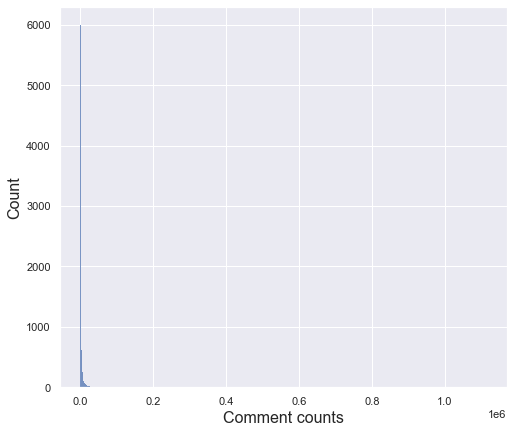

In [94]:
sns.set(style="darkgrid")
plt.figure(figsize = (8, 7))

sns.histplot(x = df_youtube_canada["comment_count"])
plt.xlabel("Comment counts", fontsize = 16)
plt.ylabel("Count", fontsize = 16)

plt.show()

The comment counts column has a very large deviation with a minimum value of 0 and a maximum value of 1,114,800. Therefore, the standard deviation is also very large of 21,579. For this reason, even if you draw a histogram, you cannot check the distribution properly as above. To see the distribution in more detail, let's check only the data within the 95% percentile

In [96]:
percentile_95_comments = np.percentile(df_youtube_canada["comment_count"], 95)
percentile_95_comments

19210.0

95% percentile of comment counts column is 19210.

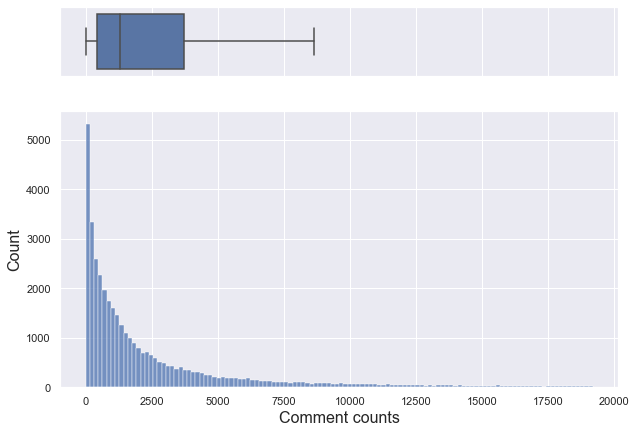

In [97]:
sns.set(style="darkgrid")

fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios": (.2, .8)}, figsize = (10, 7))

sns.boxplot(x = df_youtube_canada.comment_count, ax = ax_box, showfliers = False)
sns.histplot(x = df_youtube_canada[df_youtube_canada["comment_count"] <= percentile_95_comments].comment_count, ax = ax_hist)

plt.xlabel("Comment counts", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
ax_box.set_xlabel("")

plt.show()

If you only look at data below 95% percentile, it is a right-skewed graph with a median of about 1,301.

In [98]:
np.log(df_youtube_canada[df_youtube_canada["comment_count"] > 0].comment_count).describe()

count    40235.000000
mean         7.116182
std          1.752948
min          0.000000
25%          6.102559
50%          7.202661
75%          8.238801
max         13.924186
Name: comment_count, dtype: float64

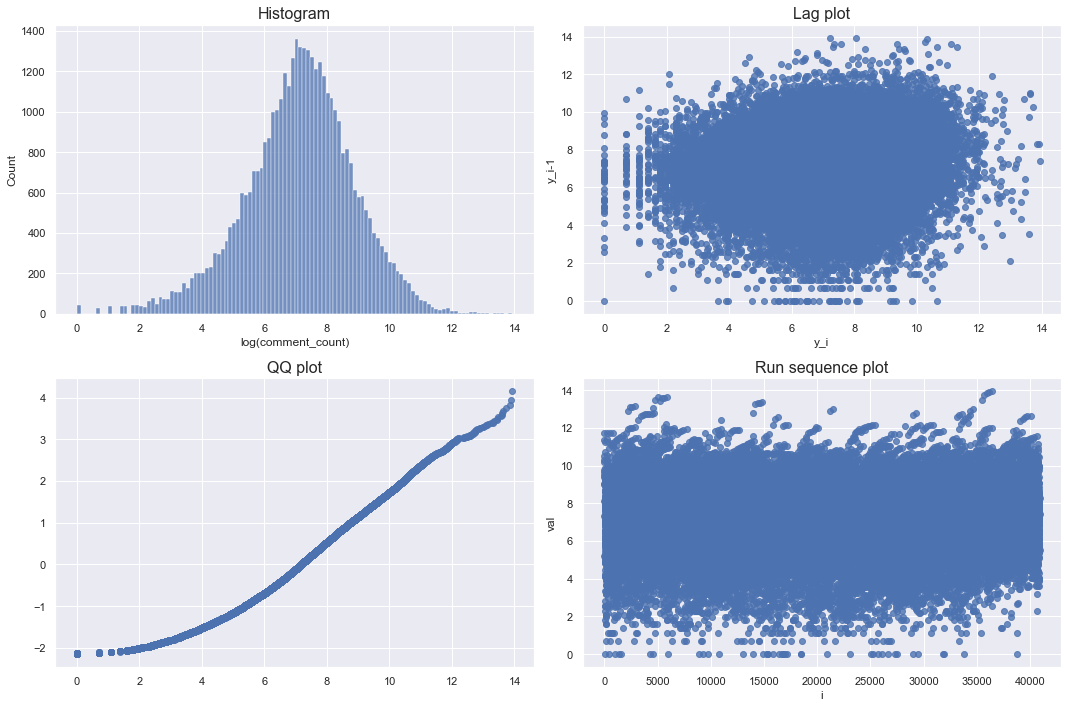

In [99]:
checkPlots(data = df_youtube_canada, column = "comment_count", isLogTransform = True)

Looking at the log-transformed graph, the lag plot and run sequence plot do not show any pattern. Although the qq plot deviated a little from the diagonal, it can be seen that it is almost like a bell shape. Therefore, the log-transformed comment counts approximates the normal distribution.

#### Pair plot

<Figure size 1440x1440 with 0 Axes>

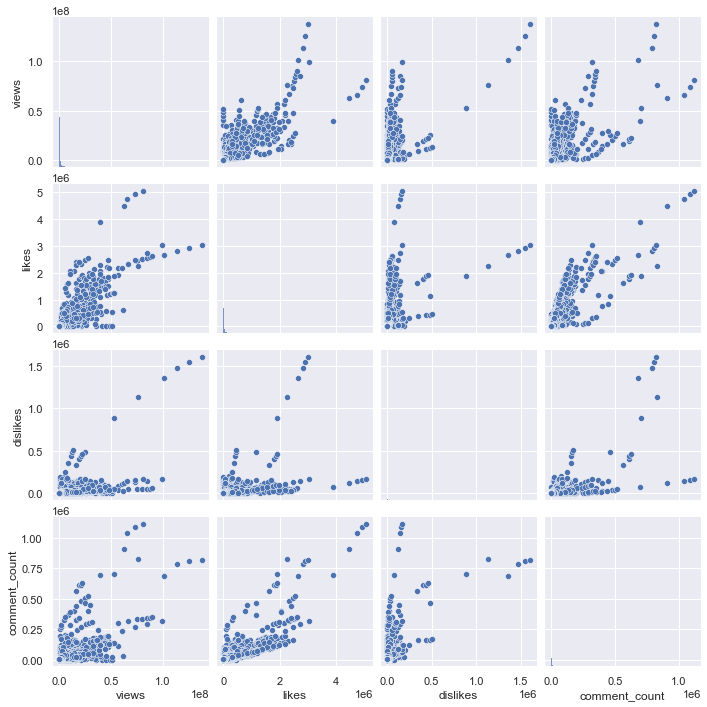

In [100]:
plt.figure(figsize = (20,20))
sns.pairplot(df_youtube_canada, vars = ['views', 'likes', 'dislikes', 'comment_count'])
plt.show()

Above is a pair plot of views, likes, dislikes, and comment_counts. It is difficult to check the overall distribution because of some extreme values, so let's draw only the data below the 95% percentile for each column. Also, since there are too many points, it is difficult to check the distribution with a simple scatter plot, so let's check it with a kde plot.

In [101]:
df_youtube_canada["country"] = "Canada"

df_youtube_canada_under_percentile = df_youtube_canada[(df_youtube_canada.views <= np.percentile(df_youtube_canada.views, 95)) & \
                                                       (df_youtube_canada.likes <= np.percentile(df_youtube_canada.likes, 95)) & \
                                                       (df_youtube_canada.dislikes <= np.percentile(df_youtube_canada.dislikes, 95)) & \
                                                       (df_youtube_canada.comment_count <= np.percentile(df_youtube_canada.comment_count, 95))]

In [102]:
df_youtube_canada.shape, df_youtube_canada_under_percentile.shape

((40881, 17), (37131, 17))

When only data that falls below the 95% percentile for each column are selected, only 3000 data out of a total of 40,000 are excluded, so it can be seen that the distribution is not affected significantly.

<Figure size 1440x1440 with 0 Axes>

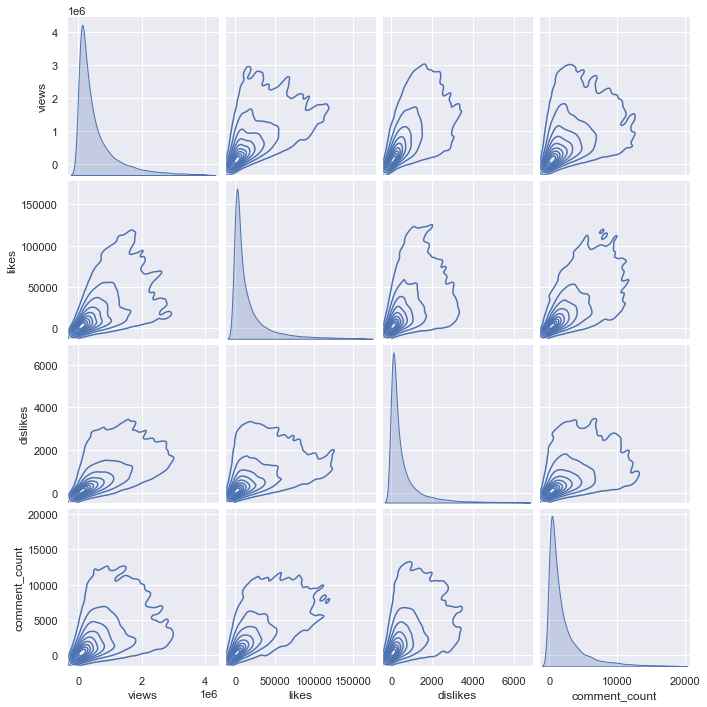

In [103]:
plt.figure(figsize = (20,20))
sns.pairplot(df_youtube_canada_under_percentile, vars = ['views', 'likes', 'dislikes', 'comment_count'], kind = "kde")
plt.show()

The above shows a kde pair plot of columns. But for kde plot, the code takes too long to run, so let's sample only 3000 and draw it.

<Figure size 1440x1440 with 0 Axes>

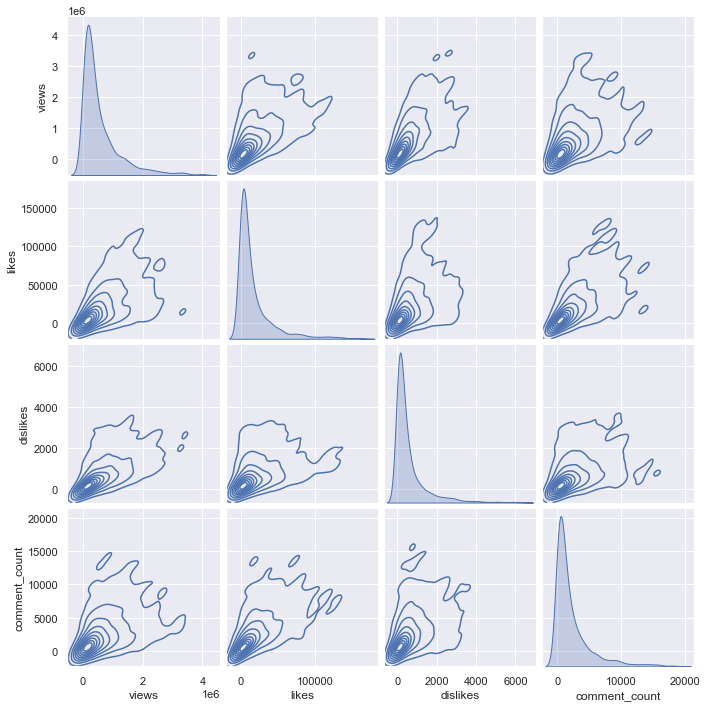

In [104]:
np.random.seed(0)
plt.figure(figsize = (20,20))
sns.pairplot(df_youtube_canada_under_percentile.sample(3000), vars = ['views', 'likes', 'dislikes', 'comment_count'], kind = "kde")
plt.show()

Comparing the kde plot of the total 37000 data and the kde plot of the sampled 3000 data shows almost similarities. Of course, it would be good to compare the distribution through the entire data, but since there is a problem that the code does not run, let's sample only 3000 data for each country and compare the kde plot.

In [105]:
# read France data
df_youtube_france = pd.read_csv("./data/FRvideos.csv")
df_youtube_france["country"] = "France"

df_youtube_france_under_percentile = df_youtube_france[(df_youtube_france.views <= np.percentile(df_youtube_france.views, 95)) & \
                                                       (df_youtube_france.likes <= np.percentile(df_youtube_france.likes, 95)) & \
                                                       (df_youtube_france.dislikes <= np.percentile(df_youtube_france.dislikes, 95)) & \
                                                       (df_youtube_france.comment_count <= np.percentile(df_youtube_france.comment_count, 95))]

# read US data
df_youtube_us = pd.read_csv("./data/USvideos.csv")
df_youtube_us["country"] = "United States"

df_youtube_us_under_percentile = df_youtube_us[(df_youtube_us.views <= np.percentile(df_youtube_us.views, 95)) & \
                                               (df_youtube_us.likes <= np.percentile(df_youtube_us.likes, 95)) & \
                                               (df_youtube_us.dislikes <= np.percentile(df_youtube_us.dislikes, 95)) & \
                                               (df_youtube_us.comment_count <= np.percentile(df_youtube_us.comment_count, 95))]

# read Germany data
df_youtube_germany = pd.read_csv("./data/DEvideos.csv")
df_youtube_germany["country"] = "Germany"

df_youtube_germany_under_percentile = df_youtube_germany[(df_youtube_germany.views <= np.percentile(df_youtube_germany.views, 95)) & \
                                                         (df_youtube_germany.likes <= np.percentile(df_youtube_germany.likes, 95)) & \
                                                         (df_youtube_germany.dislikes <= np.percentile(df_youtube_germany.dislikes, 95)) & \
                                                         (df_youtube_germany.comment_count <= np.percentile(df_youtube_germany.comment_count, 95))]

# read Great Britain data
df_youtube_gb = pd.read_csv("./data/GBvideos.csv")
df_youtube_gb["country"] = "Great Britain"

df_youtube_gb_under_percentile = df_youtube_gb[(df_youtube_gb.views <= np.percentile(df_youtube_gb.views, 95)) & \
                                               (df_youtube_gb.likes <= np.percentile(df_youtube_gb.likes, 95)) & \
                                               (df_youtube_gb.dislikes <= np.percentile(df_youtube_gb.dislikes, 95)) & \
                                               (df_youtube_gb.comment_count <= np.percentile(df_youtube_gb.comment_count, 95))]


<Figure size 1440x1440 with 0 Axes>

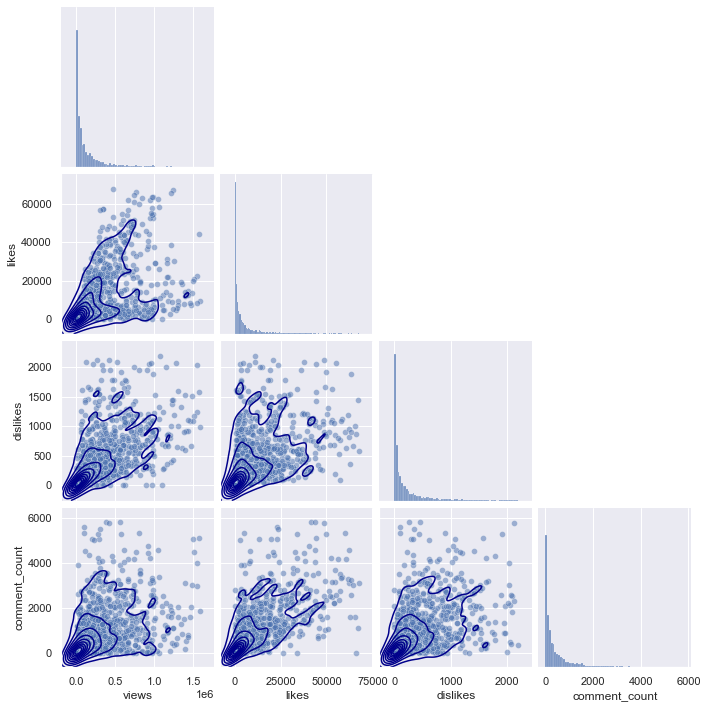

In [106]:
plt.figure(figsize = (20,20))
sns.color_palette()
g = sns.pairplot(df_youtube_france_under_percentile.sample(3000), \
                 vars = ['views', 'likes', 'dislikes', 'comment_count'], \
                 plot_kws = {'alpha':0.5}, corner = True)
g.map_lower(sns.kdeplot, color = "darkBlue")
plt.show()

<Figure size 1440x1440 with 0 Axes>

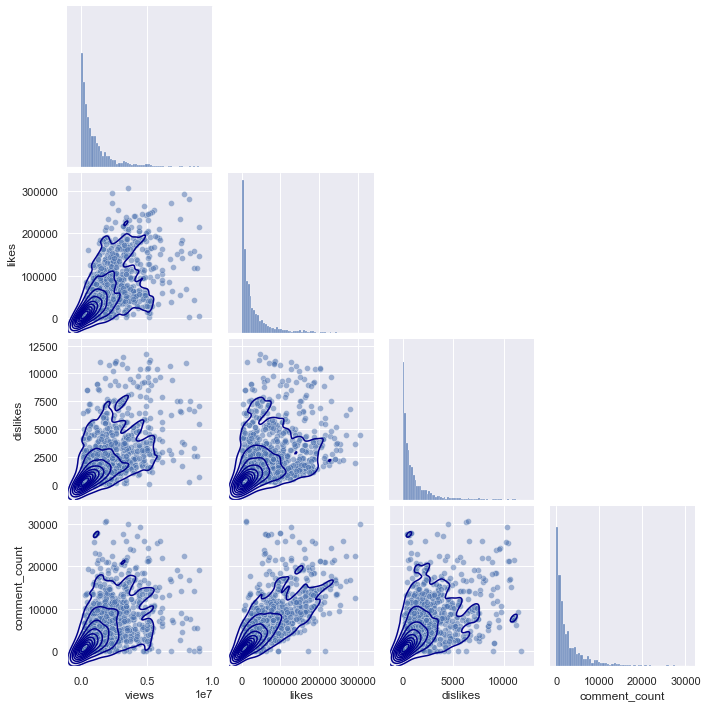

In [107]:
plt.figure(figsize = (20,20))
sns.color_palette()
g = sns.pairplot(df_youtube_us_under_percentile.sample(3000), \
                 vars = ['views', 'likes', 'dislikes', 'comment_count'], \
                 plot_kws = {'alpha':0.5}, corner = True)
g.map_lower(sns.kdeplot, color = "darkBlue")
plt.show()

<Figure size 1440x1440 with 0 Axes>

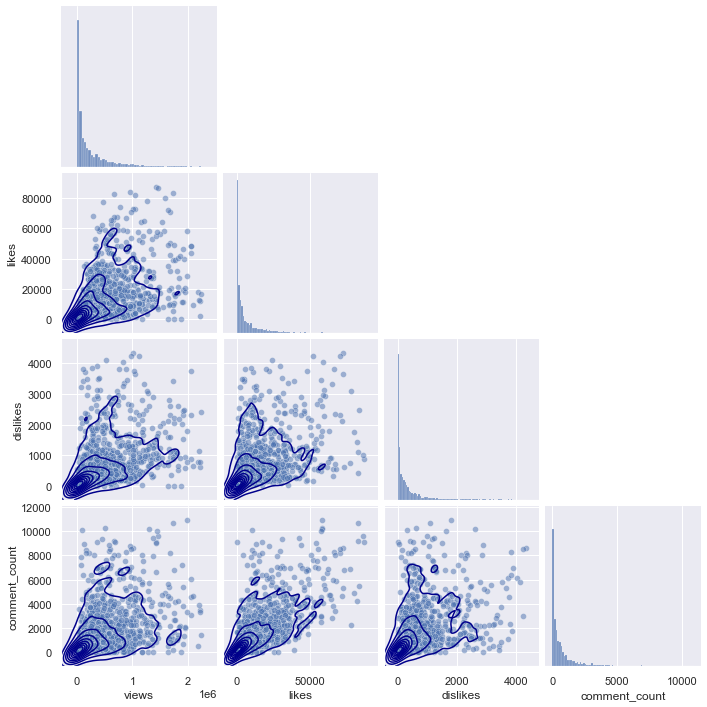

In [108]:
plt.figure(figsize = (20,20))
sns.color_palette()
g = sns.pairplot(df_youtube_germany_under_percentile.sample(3000), \
                 vars = ['views', 'likes', 'dislikes', 'comment_count'], \
                 plot_kws = {'alpha':0.5}, corner = True)
g.map_lower(sns.kdeplot, color = "darkBlue")
plt.show()

<Figure size 1440x1440 with 0 Axes>

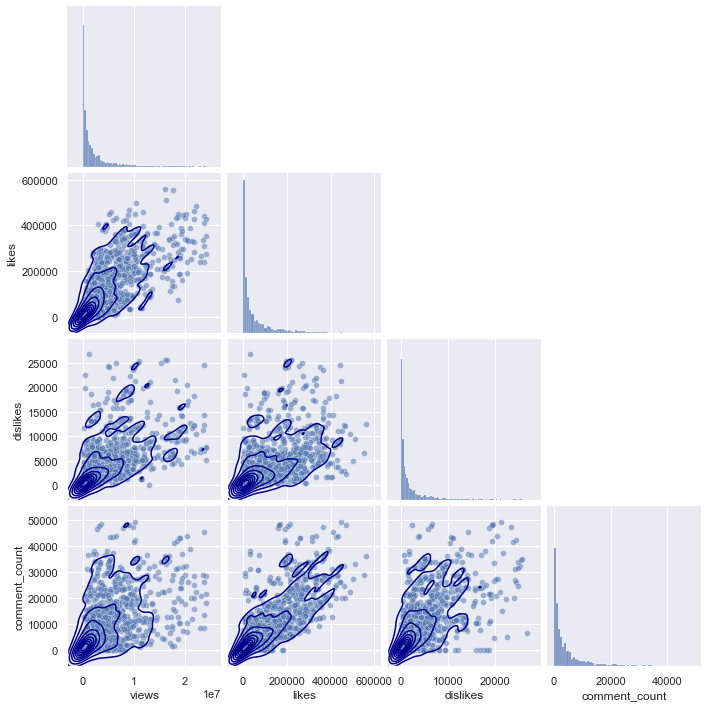

In [109]:
plt.figure(figsize = (20,20))
sns.color_palette()
g = sns.pairplot(df_youtube_gb_under_percentile.sample(3000), \
                 vars = ['views', 'likes', 'dislikes', 'comment_count'], \
                 plot_kws = {'alpha':0.5}, corner = True)
g.map_lower(sns.kdeplot, color = "darkBlue")
plt.show()

If you look at the pairplots of the other regions, you can see that they all have a similar distribution, starting from (0,0), and gradually spreading as the x-axis and y-axis values ​​increase.

### <span style="color:magenta"> Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice </span>

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Experiment with colormaps that are different from the default one and choose one that you think is best.  Comment on why you think so.
* Are there any interesting correlations? What are they?

In [110]:
us_corr = df_youtube_us.corr()
us_corr

category_id     views     likes  dislikes  \
category_id                1.000000 -0.168231 -0.173921 -0.033547   
views                     -0.168231  1.000000  0.849177  0.472213   
likes                     -0.173921  0.849177  1.000000  0.447186   
dislikes                  -0.033547  0.472213  0.447186  1.000000   
comment_count             -0.076307  0.617621  0.803057  0.700184   
comments_disabled          0.048949  0.002677 -0.028918 -0.004431   
ratings_disabled          -0.013506  0.015355 -0.020888 -0.008230   
video_error_or_removed    -0.030011 -0.002256 -0.002641 -0.001853   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.076307           0.048949         -0.013506   
views                        0.617621           0.002677          0.015355   
likes                        0.803057          -0.028918         -0.020888   
dislikes                     0.700184          -0.004431         -0.008230   
comment_count                1.000000          -0.028277         -0.013819   
comments_disabled           -0.028277           1.000000          0.319230   
ratings_disabled            -0.013819           0.319230          1.000000   
video_error_or_removed      -0.003725          -0.002970         -0.001526   

                        video_error_or_removed  
category_id                          -0.030011  
views                                -0.002256  
likes                                -0.002641  
dislikes                             -0.001853  
comment_count                        -0.003725  
comments_disabled                    -0.002970  
ratings_disabled                     -0.001526  
video_error_or_removed                1.000000

The above table shows the correlation matrix of numerical variables

In [112]:
df_corr = us_corr.unstack().reset_index().rename(columns = {"level_0" : "var1", "level_1" : "var2", 0 : "correlation"})
mask_dups = (df_corr[['var1', 'var2']].apply(frozenset, axis=1).duplicated()) | (df_corr['var1'] == df_corr['var2']) 
df_corr = df_corr[~mask_dups]
df_corr.sort_values("correlation", key = abs, ascending = False).head(5)


var1           var2  correlation
10     views          likes     0.849177
20     likes  comment_count     0.803057
28  dislikes  comment_count     0.700184
12     views  comment_count     0.617621
11     views       dislikes     0.472213

If 5 pairs with high correlation are selected, it is as above. Since views and likes, likes and comment counts have very high values ​​of 0.8 or more, it can be seen that there is a strong linear relationship between the two variables.

<AxesSubplot:>

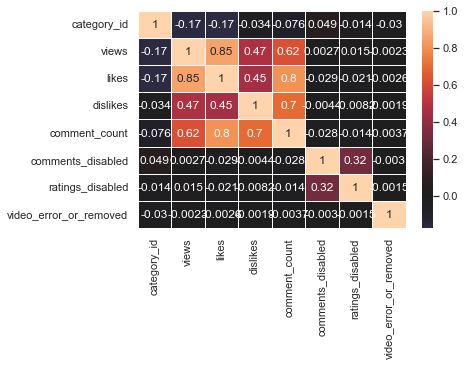

In [126]:
sns.heatmap(us_corr, annot = True, linewidths = .5, center = 0)

The above graph is a heatmap of the correlation matrix. Let's try with colormaps that are different from the default one.

<AxesSubplot:>

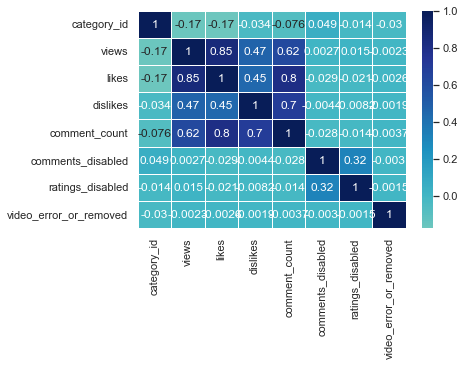

In [113]:
sns.heatmap(us_corr, annot = True, linewidths = .5, cmap="YlGnBu", center = 0)

<AxesSubplot:>

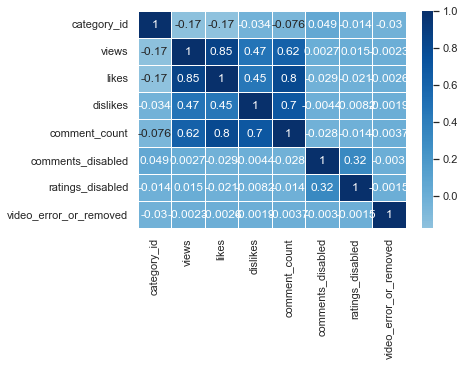

In [114]:
sns.heatmap(us_corr, annot = True, linewidths = .5, cmap="Blues", center = 0)

<AxesSubplot:>

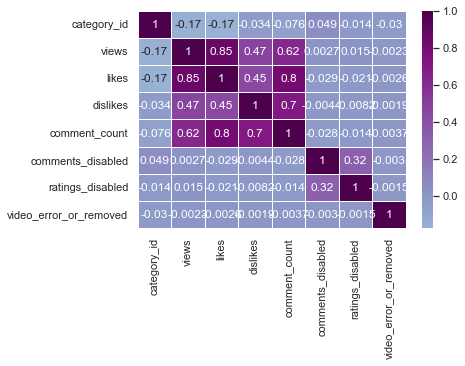

In [115]:
sns.heatmap(us_corr, annot = True, linewidths = .5, cmap="BuPu", center = 0)

<AxesSubplot:>

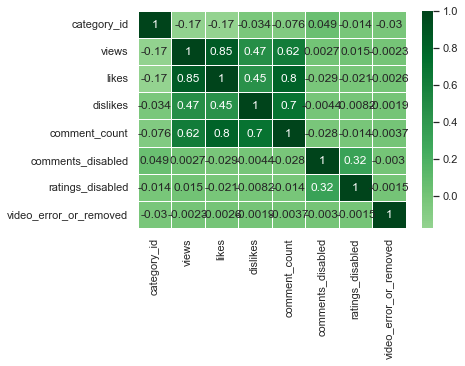

In [116]:
sns.heatmap(us_corr, annot = True, linewidths = .5, cmap="Greens", center = 0)

<AxesSubplot:>

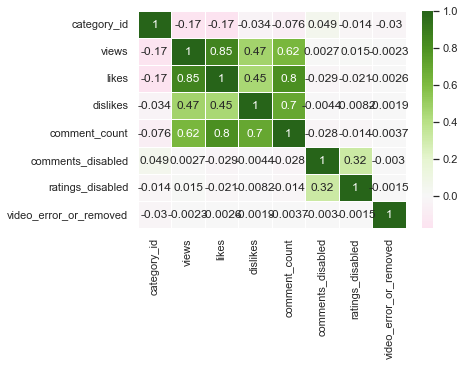

In [117]:
sns.heatmap(us_corr, annot = True, linewidths = .5, cmap="PiYG", center = 0)

<AxesSubplot:>

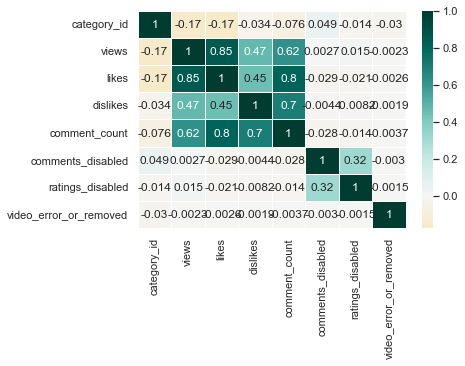

In [118]:
sns.heatmap(us_corr, annot = True, linewidths = .5, cmap="BrBG", center = 0)

I think BrBG is the best because the distinction between high and low values ​​is clear.

Although correlation was obtained with all numerical columns, category_id, comments_disabled, ratings_disabled, and video_error_or_removed columns do not have numerical meaning. Therefore, it can be seen that only the views, likes, dislikes, and comment_counts columns that have real numerical meaning have high correlation values. Among them, the linear relationship between view and like, like and comment_count, and dislike and comment_count was strong.

### <span style="color:magenta"> Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice </span>
* Use statsmodels to perform an ANOVA (categorical regression) of a variable of your choice as the dependent variable (for example, views) and the video category as the independent variable. Note that you need to use a categorical variable as your independent variable.
* Provide your interpretation of the results. 
* Create two different regression models where the dependent variable is the same, and the independent variables are different.  Note that your independent variable needs to be a continuous numerical variables. What does your interpretation say about the two models?

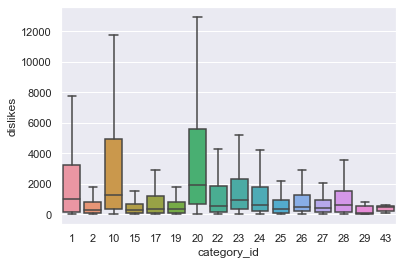

In [124]:
sns.boxplot(x = "category_id", y = "dislikes", data = df_youtube_us, showfliers = False)
plt.show()

The boxplot between category_id and dislikes in us region is as above. Among category_ids, 1, 10, and 20 seem to have a higher number of dislikes, especially compared to other categories. Let's check this numerically through anova analysis.


In [125]:
lm0 = smf.ols("dislikes ~ category_id", data = df_youtube_us)
res0 = lm0.fit()
print(res0.summary())

                            OLS Regression Results                            
Dep. Variable:               dislikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     46.13
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.12e-11
Time:                        15:46:37   Log-Likelihood:            -4.7888e+05
No. Observations:               40949   AIC:                         9.578e+05
Df Residuals:                   40947   BIC:                         9.578e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6281.3987    404.626     15.524      

When anova analysis is performed, the F-statistic probability is almost 0. This means that the null hypothesis that there is no significant difference between Generations can be rejected, so it can be seen that there is statistical difference in dislikes between category_id.

In [126]:
tukeyhsd_res0 = pairwise_tukeyhsd(df_youtube_us["dislikes"], df_youtube_us["category_id"])
tukeyhsd_res0.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The above shows the turkeyhsd table for dislikes between category_id. When the reject column is true, it can be interpreted that there is a statistically significant difference between the two groups. As can be seen from the table above, there are many pairs with a significant difference in dislikes between category_id.

Also, after merging the data from all 5 regions, let's check if there is a significant difference in the dislike value by region.

In [127]:
df_youtube = pd.concat([df_youtube_canada, df_youtube_france, df_youtube_us, df_youtube_germany,
                        df_youtube_gb], axis = 0, ignore_index = True)

<AxesSubplot:xlabel='country', ylabel='dislikes'>

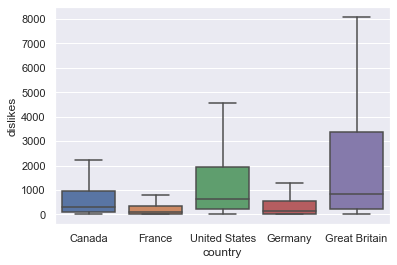

In [128]:
sns.boxplot(x = "country", y = "dislikes", data=df_youtube, showfliers = False)

Looking at the boxplot, it seems that United States and Great Britain regions have particularly high dislikes. Let's check this numerically through anova analysis.

In [129]:
lm0 = smf.ols("dislikes ~ country", data = df_youtube)
res0 = lm0.fit()
print(res0.summary())

                            OLS Regression Results                            
Dep. Variable:               dislikes   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     365.5
Date:                Tue, 15 Feb 2022   Prob (F-statistic):          3.44e-314
Time:                        15:52:38   Log-Likelihood:            -2.3623e+06
No. Observations:              202310   AIC:                         4.725e+06
Df Residuals:                  202305   BIC:                         4.725e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

When anova analysis is performed, the F-statistic probability is almost 0. This means that the null hypothesis that there is no significant difference between Generations can be rejected, so it can be seen that there is statistical difference in dislikes between 5 regeions.

In [164]:
tukeyhsd_res0 = pairwise_tukeyhsd(df_youtube["dislikes"], df_youtube["country"])
tukeyhsd_res0.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The above shows the turkeyhsd table for dislikes between regeions. When the reject column is true, it can be interpreted that there is a statistically significant difference between the two groups. As can be seen from the table above, All different regeion pairs showed statistically significant differences in dislike values.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)* </span>
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [25]:
df_pokemon = pd.read_csv("./data/Pokemon.csv")

In [7]:
df_pokemon.head()

#                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False

Delete the "#" column because it is an index.

In [8]:
df_pokemon.drop("#", axis = 1, inplace = True)
df_pokemon.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
0              Bulbasaur  Grass  Poison    318  45      49       49       65   
1                Ivysaur  Grass  Poison    405  60      62       63       80   
2               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

In [9]:
df_pokemon.shape

(800, 12)

Pokemon data consists of a total of 800 rows and 12 columns.

In [10]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


It can be seen that only type2 has a missing value.

### <span style="color:magenta"> Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.). </span>

* Which pairs have the most/least correlation coefficients?

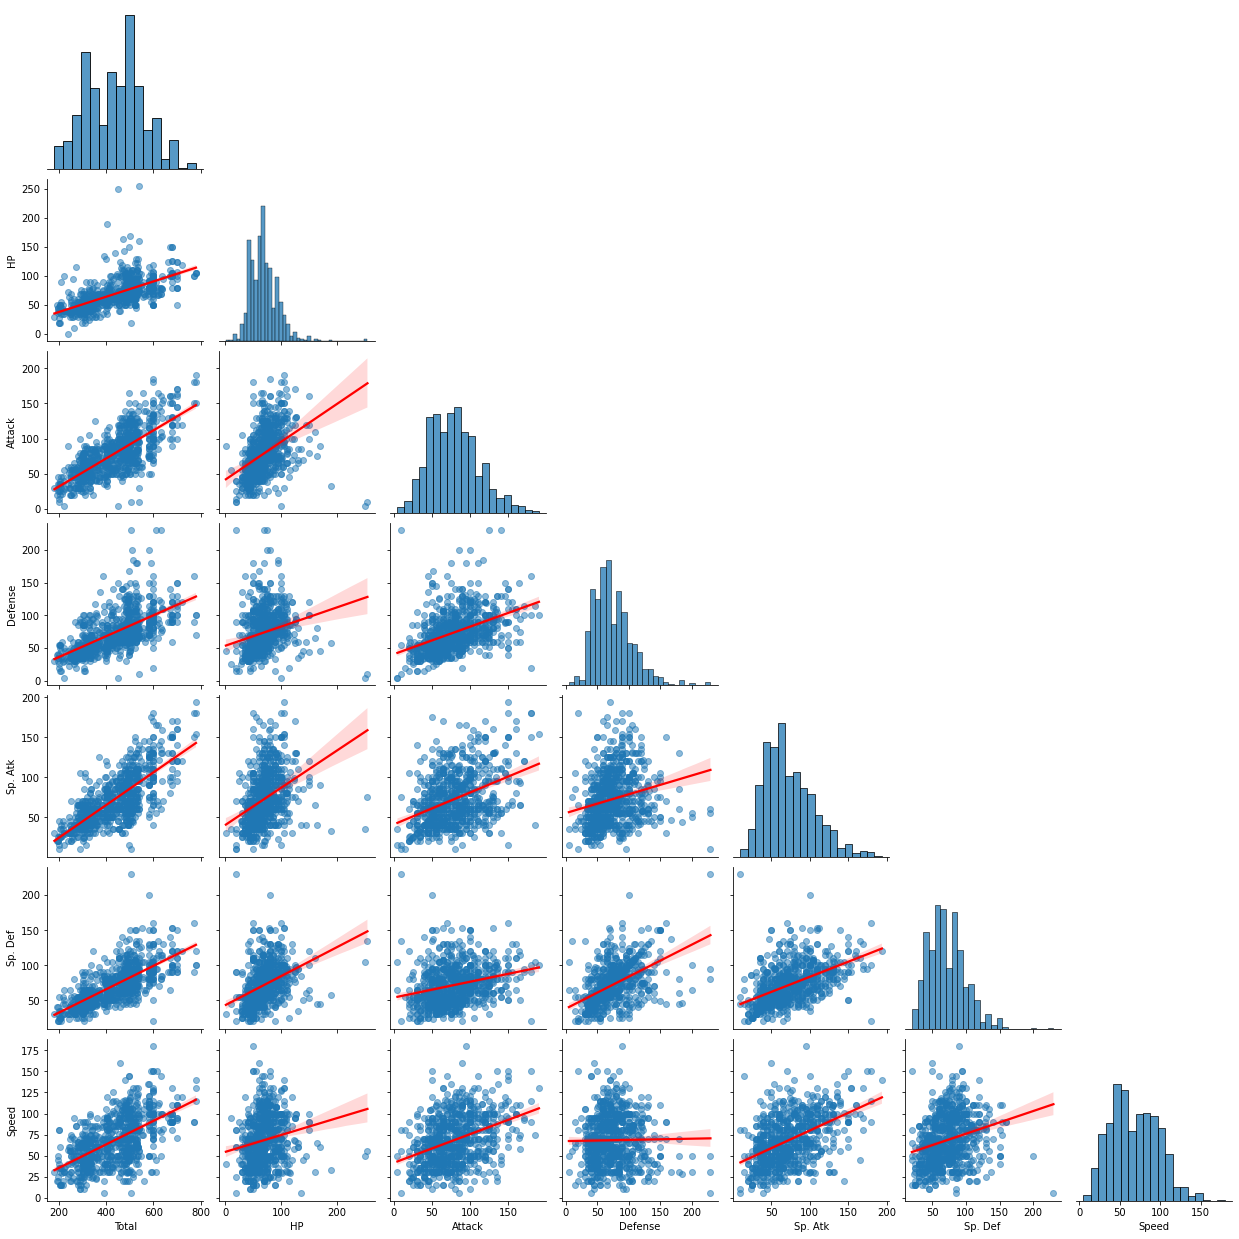

In [11]:
sns.pairplot(data = df_pokemon, vars = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"], \
             kind = "reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}}, corner = True)

The graph above is a pair plot of different abilities. Through the red regression line in each scatter plot, it is possible to check how much linear relationship there is between the two variables. When visually confirmed, the linear relationship between HP and Attack, and Total and Sp.Atk was strongest, and the linear relationship between Defense and Speed was the smallest. Let's check this numerically.

In [12]:
pokemon_ability_corr = df_pokemon[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].corr()
pokemon_ability_corr

Total        HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
Total    1.000000  0.618748  0.736211  0.612787  0.747250  0.717609  0.575943
HP       0.618748  1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.736211  0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.612787  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.747250  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.717609  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.575943  0.175952  0.381240  0.015227  0.473018  0.259133  1.000000

<AxesSubplot:>

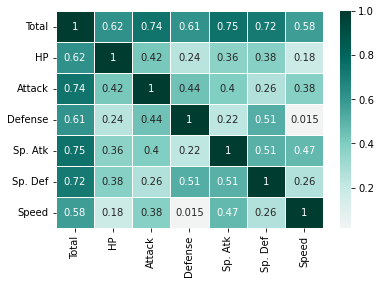

In [13]:
sns.heatmap(pokemon_ability_corr, annot = True, linewidths = .5, cmap="BrBG", center = 0)

Looking at the above table and heat map, it can be seen that total has a strong linear relationship with all other abilities. Since the stat name is total, it can be inferred that total is the sum of other abilities.

In [14]:
np.sum(df_pokemon.Total != df_pokemon["HP"] + df_pokemon["Attack"] + df_pokemon["Defense"] + \
                           df_pokemon["Sp. Atk"] + df_pokemon["Sp. Def"] + df_pokemon["Speed"])

0

As expected, it can be seen that total is the simple sum of the remaining 6 ability values. Therefore, let's check the linear relationship between the other abilities except for the total ability.

In [15]:
pokemon_ability_corr = df_pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].corr()
pokemon_ability_corr

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000

<AxesSubplot:>

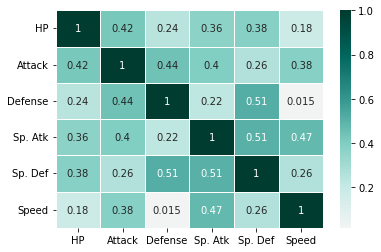

In [16]:
sns.heatmap(pokemon_ability_corr, annot = True, linewidths = .5, cmap="BrBG", center = 0)

When Total was excluded, Defense and Sp.Def, and Sp.Atk and Sp.Def showed the highest correlation at 0.51. Also, since the correlation between Speed and Defense is 0.015, as confirmed in the pair plot earlier, it can be seen that there is little linear relationship between the two abilities.

### <span style="color:magenta"> Q5. For 15 Points: Plot the distribution of ability points per Pokémon type </span>

* How would you describe each Pokémon type with different ability points?

There are two types of Pokemon: Type1 and Type2.

In [22]:
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


Looking at the table above, all Pokemon have Type1, but about half do not have Type2.

In [20]:
print(sorted(df_pokemon["Type 1"].unique()))

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


There are a total of 18 types in Type1 as shown in the list above.

In [28]:
print(sorted(df_pokemon[df_pokemon["Type 2"].isnull() == False]["Type 2"].unique()))

['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel', 'Water']


As in the list above, in Type2, there are a total of 18 types. If we compare Type1 and Type2, we can confirm that they are all the same. It is said that the order of Type1 and Type2 is not important in the real Pokemon world. (https://forums.serebii.net/threads/does-type-order-really-matter.316547/) 

In [29]:
# Create data by combining type1 and type2 columns as one Type column. Dual type Pokemon will have 2 rows.
df_pokemon_type_indifference = df_pokemon[['Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', \
                                           'Sp. Def', 'Speed', 'Generation', 'Legendary']] \
                                   .merge(pd.concat([df_pokemon[["Name", "Type 1"]].rename(columns = {"Type 1" : "Type"}), \
                                                     df_pokemon[["Name", "Type 2"]].rename(columns = {"Type 2" : "Type"})], \
                                                     axis = 0, ignore_index = True), \
                                          on = "Name", how = "left") \
                                   [["Name", "Type", "Total", "HP", "Attack", 'Defense', 'Sp. Atk', \
                                     'Sp. Def', 'Speed', 'Generation', 'Legendary']]

In [30]:
type_count = df_pokemon_type_indifference.Type.value_counts().reset_index().rename(columns = {"index" : "Type", "Type" : "Total Count"}) \
             .merge(df_pokemon[df_pokemon["Type 2"].isnull()]["Type 1"].value_counts().reset_index() \
             .rename(columns = {"index" : "Type", "Type 1" : "Single-type Count"}), on = "Type", how = "left")
type_count["Single-type Ratio"] = np.round(type_count["Single-type Count"] / type_count["Total Count"] * 100, 2)
type_count

Type  Total Count  Single-type Count  Single-type Ratio
0      Water          126                 59              46.83
1     Normal          102                 61              59.80
2     Flying          101                  2               1.98
3      Grass           95                 33              34.74
4    Psychic           90                 38              42.22
5        Bug           72                 17              23.61
6     Ground           67                 13              19.40
7       Fire           64                 28              43.75
8     Poison           62                 15              24.19
9       Rock           58                  9              15.52
10  Fighting           53                 20              37.74
11      Dark           51                 10              19.61
12    Dragon           50                 11              22.00
13  Electric           50                 27              54.00
14     Steel           49                  5              10.20
15     Ghost           46                 10              21.74
16     Fairy           40                 15              37.50
17       Ice           38                 13              34.21

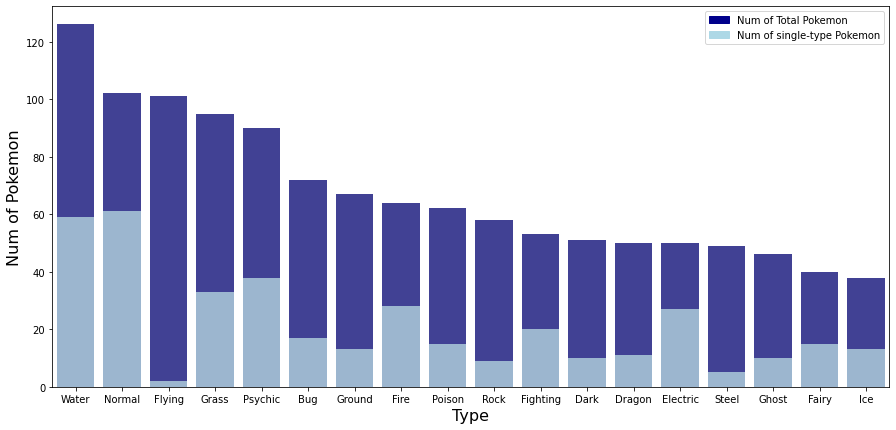

In [31]:
plt.figure(figsize = (15, 7))

# bar graph for total pokemon count
color = "darkblue"
ax1 = sns.barplot(x = "Type", y = "Total Count", color = color, alpha = 0.8, \
                  data = type_count)
ax1.set_xlabel("Type", fontsize = 16)
top_bar = mpatches.Patch(color = color, label = 'Num of Total Pokemon')

# bar graph for total non-type2 pokemon count
color = "lightblue"
ax2 = sns.barplot(x = "Type", y = "Single-type Count",  color = color, alpha = 0.8, \
                  data = type_count)
ax2.set_ylabel("Num of Pokemon", fontsize = 16)
low_bar = mpatches.Patch(color = color, label = 'Num of single-type Pokemon')

plt.legend(handles=[top_bar, low_bar])
plt.show()

The table and graph above show the total number of Pokemon and total number of single-type Pokemon for each type. Looking at the number of total pokemon, the most common type is Water type, followed by Normal, Flying, Grass, and Psychic type. The types with the fewest Pokemon are fairy and ice types. It can be seen that Pokemon belonging to the water type are three times larger than the Pokemon belonging to the ice type. Also, when looking at the ratio of single-type Pokemon, about 20 to 50% of Pokemon belonging to each type were single-type Pokémon. However, the ratio of Flying type is 1.98% and Steel type1 is 10.2%, which is very small compared to other types. In other words, most Flying and Steel type Pokemon are dual type Pokemon with another type. On the other hand, in electric, the ratio of single-type Pokemon was about 54% and normal was about 59.8%, which was significantly higher than other types. In other words, about half of electric and normal type Pokemon are single type Pokemon that do not have another type.

In [32]:
df_pokemon_type_indifference[df_pokemon_type_indifference.Legendary == True] \
                       .groupby(["Type", "Legendary"]).count().Name.sort_values(ascending = False) \
                       .reset_index().rename(columns = {"Name" : "Count"})

Type  Legendary  Count
0    Psychic       True     19
1     Dragon       True     16
2     Flying       True     15
3       Fire       True      8
4   Electric       True      5
5     Ground       True      5
6        Ice       True      5
7      Steel       True      5
8      Water       True      5
9   Fighting       True      4
10      Rock       True      4
11      Dark       True      3
12     Fairy       True      3
13     Ghost       True      3
14     Grass       True      3
15    Normal       True      2

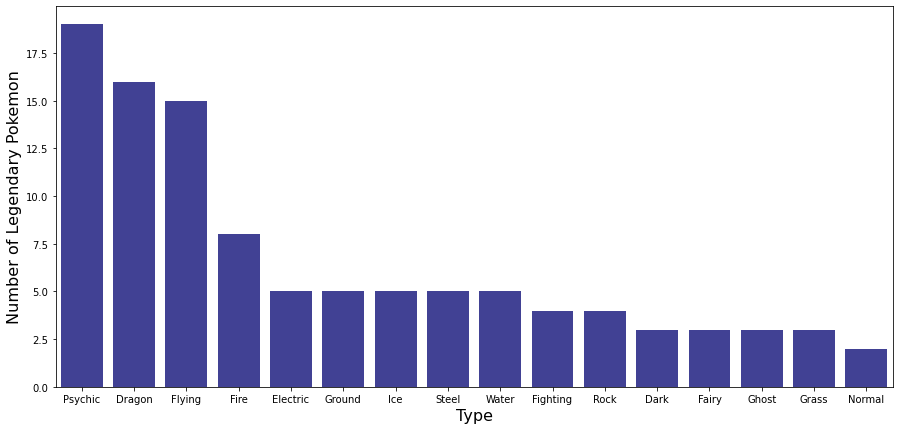

In [33]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "Type", y = "Count", color = "darkblue", alpha = 0.8, \
            data = df_pokemon_type_indifference[df_pokemon_type_indifference.Legendary == True] \
                       .groupby(["Type", "Legendary"]).count().Name.sort_values(ascending = False) \
                       .reset_index().rename(columns = {"Name" : "Count"}))
plt.xlabel("Type", fontsize = 16)
plt.ylabel("Number of Legendary Pokemon", fontsize = 16)
plt.show()

The table and graph above show the number of legendary Pokemon for each type. While most types have fewer than 5 legendary Pokemon, Psychic, Dragon, and Flying Pokemon have more than 15 legendary Pokemon each.

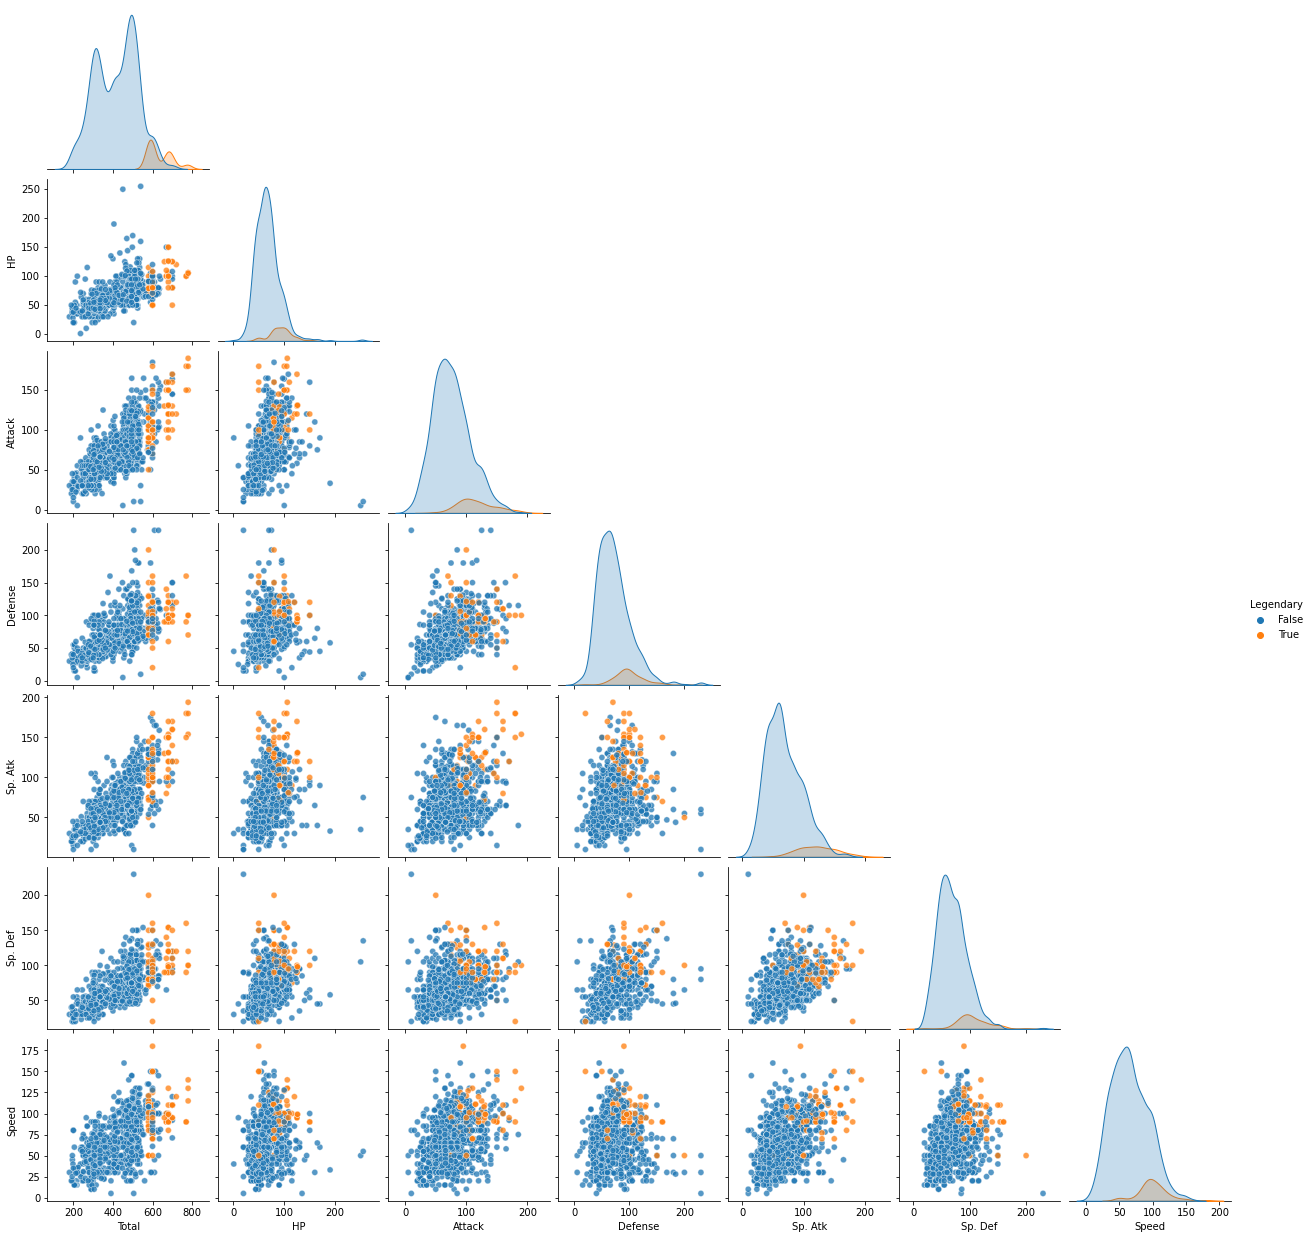

In [34]:
sns.pairplot(data = df_pokemon_type_indifference, vars = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"], \
             plot_kws = {'alpha': 0.5}, corner = True, hue = "Legendary")
plt.show()

It can be seen that legendary Pokemon have higher overall abilities compared to other normal Pokemon as above. Therefore, when comparing the abilities of each Pokemon type, I think that the more general characteristics of each type can be grasped by excluding the legendary Pokemon. Therefore, in the comparison of the abilities of each type, the analysis proceeds by excluding the legendary Pokemon.


In [35]:
df_pokemon_type_indifference_non_legend = df_pokemon_type_indifference[df_pokemon_type_indifference.Legendary == False]

Now let's compare the abilities of each Pokemon type.

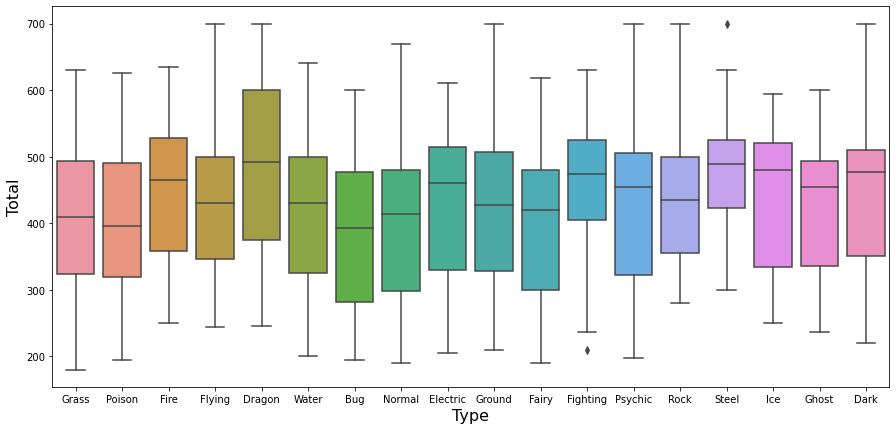

In [36]:
plt.figure(figsize = (15, 7))

sns.boxplot(data = df_pokemon_type_indifference_non_legend, x = "Type", y = "Total")
plt.xlabel("Type", fontsize = 16)
plt.ylabel("Total", fontsize = 16)
plt.show()

First, comparing the Total, the dragon type seems a bit higher than the other types.

Except for Total, Pokemon's stats include HP, Attack, Defense, Sp.Atc, Sp.Def, and Speed. Sp.Atc means special attack, Sp.Def means special defense. The higher the Speed, the first to attack. Therefore, among the six detailed stats, Hp, Defense, and Sp.Def are defense-related stats, and attack, Sp.atc, and Speed are attack-related stats. First, let's take a look at the difference between attack-related stats and defense-related stats for each type.

In [37]:
df_pokemon_type_indifference_non_legend["Total_attack"] = df_pokemon_type_indifference_non_legend["Attack"] \
                                                          + df_pokemon_type_indifference_non_legend["Sp. Atk"] \
                                                          + df_pokemon_type_indifference_non_legend["Speed"]

df_pokemon_type_indifference_non_legend["Total_defense"] = df_pokemon_type_indifference_non_legend["Defense"] \
                                                           + df_pokemon_type_indifference_non_legend["Sp. Def"] \
                                                           + df_pokemon_type_indifference_non_legend["HP"]

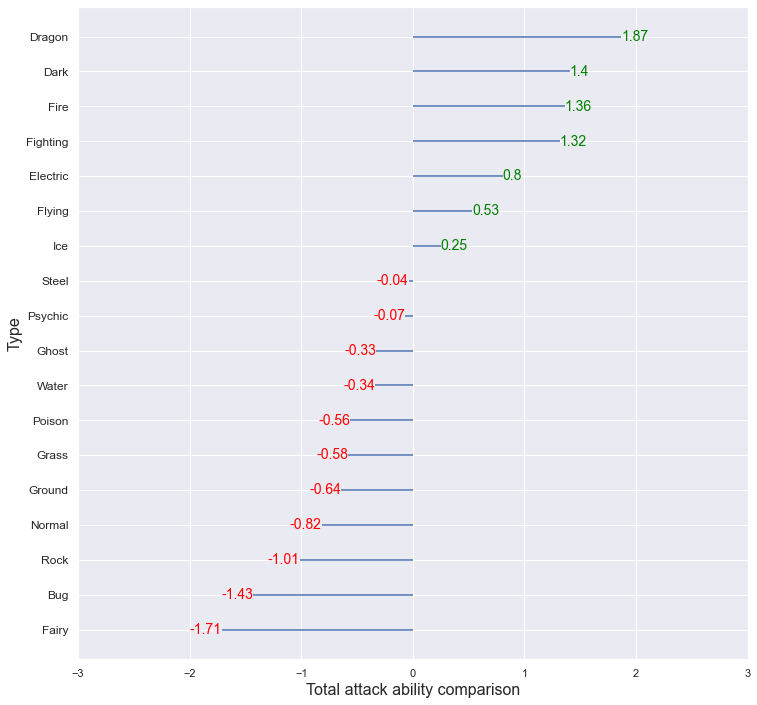

In [38]:
sns.set(style="darkgrid")

attack_by_type = df_pokemon_type_indifference_non_legend.groupby("Type").mean()["Total_attack"]
attack_by_type = pd.DataFrame((attack_by_type - np.mean(attack_by_type)) / np.std(attack_by_type)).reset_index()
attack_by_type["color"] = ['red' if x < 0 else 'green' for x in attack_by_type['Total_attack']]
attack_by_type.sort_values('Total_attack', inplace = True)

plt.figure(figsize = (12,12))
plt.hlines(y = attack_by_type.Type, xmin = 0, xmax = attack_by_type.Total_attack)
for x, y, tex in zip(attack_by_type.Total_attack, attack_by_type.Type, attack_by_type.Total_attack):
     t = plt.text(x, y, round(tex, 2),
                  horizontalalignment = 'right' if x < 0 else 'left',
                  verticalalignment = 'center',
                  fontdict = {'color':'red' if x < 0 else 'green', 'size' : 14})

plt.yticks(attack_by_type.Type, attack_by_type.Type, fontsize = 12)
plt.ylabel("Type", fontsize = 16)
plt.xlabel("Total attack ability comparison", fontsize = 16)
plt.xlim(-3, 3)
plt.show()

The average of the Total_attack for each type was obtained, and this was standardized using the overall average and variance to compare which type had relatively high or low values. Dragon type showed higher total attack ability compared to other types, and Bug and Fairy showed low total attack ability.


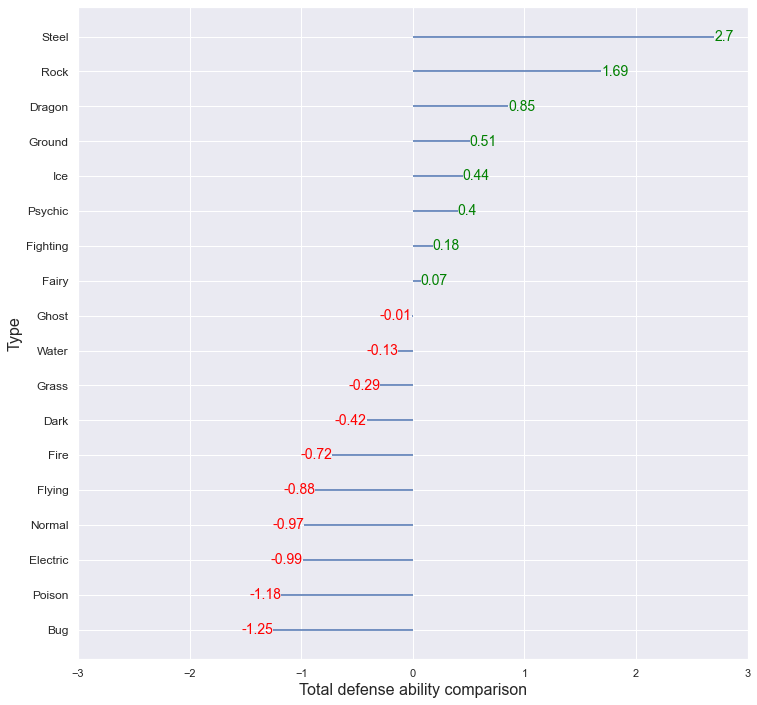

In [39]:
sns.set(style = "darkgrid")

defense_by_type = df_pokemon_type_indifference_non_legend.groupby("Type").mean()["Total_defense"]
defense_by_type = pd.DataFrame((defense_by_type - np.mean(defense_by_type)) / np.std(defense_by_type)).reset_index()
defense_by_type["color"] = ['red' if x < 0 else 'green' for x in defense_by_type['Total_defense']]
defense_by_type.sort_values('Total_defense', inplace = True)

plt.figure(figsize = (12,12))
plt.hlines(y = defense_by_type.Type, xmin = 0, xmax = defense_by_type.Total_defense)
for x, y, tex in zip(defense_by_type.Total_defense, defense_by_type.Type, defense_by_type.Total_defense):
     t = plt.text(x, y, round(tex, 2),
                  horizontalalignment = 'right' if x < 0 else 'left',
                  verticalalignment = 'center',
                  fontdict = {'color':'red' if x < 0 else 'green', 'size' : 14})

plt.yticks(defense_by_type.Type, defense_by_type.Type, fontsize = 12)
plt.ylabel("Type", fontsize = 16)
plt.xlabel("Total defense ability comparison", fontsize = 16)
plt.xlim(-3, 3)
plt.show()

The average of the Total_defense for each type was obtained, and this was standardized using the overall average and variance to compare which type had relatively high or low values. Steel, Rock type showed higher total defense ability compared to other types, and Bug and Poison showed low total defense ability. The Dragon had the highest total attack stat, and the total defense stat was also higher than other types. Due to this, the total ability value that was first seen through the boxplot appears higher than other types.


Comparing the overall attack ability and the overall defensive ability together,        
    - Above-average attack & above-average defense : Dragon, Fighting, Ice          
    - Above-average attack & below-average defense : Dark, Fire, Electric, Flying          
    - Below Average Attack & Above Average Defense : Steel, Psychic, Ground, Rock, Fairy          
    - Below Average Attack & Below Average Defense : Ghost, Water, Poison, Grass, Normal, Bug          

### <span style="color:magenta"> Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other? </span>

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

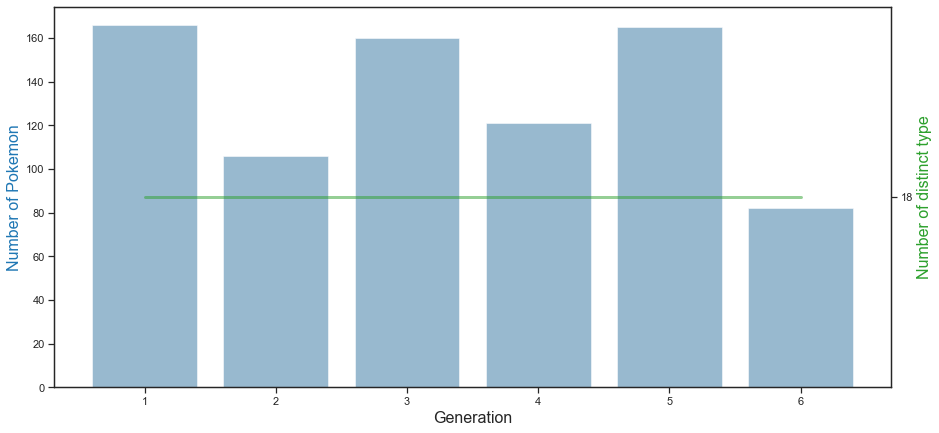

In [43]:
sns.set(style = "ticks")
plt.figure(figsize = (15, 7))

# bar plot for value count of each generation
color = "tab:blue"
ax1 = sns.barplot(x = "Generation", y = "Count", color = color, alpha = 0.5, \
                  data = df_pokemon.Generation.value_counts().reset_index().rename(columns = {"index" : "Generation", "Generation" : "Count"}))
ax1.set_xlabel("Generation", fontsize = 16)
ax1.set_ylabel("Number of Pokemon", color = color, fontsize = 16)

# line plot for number of Type1 of each generation
ax2 = ax1.twinx()
color = "tab:green"
ax2 = sns.lineplot(data = df_pokemon_type_indifference.groupby("Generation")["Type"].nunique().values, color = color, linewidth = 3, alpha = 0.5)
ax2.set_ylabel("Number of distinct type", color = color, fontsize = 16)
plt.yticks([18])

plt.show()

n the graph above, the blue bar graph shows the number of Pokémon per generation, and the green line graph shows the number of distinct types per generation. 1st generation Pokemon has the most, followed by 3rd and 5th generation Pokemon. Generation 6 Pokemon is the smallest with about 80. Also, it can be seen that 18 types of Pokemon exist in all of the 1st to 6th generations.

Next, let's look at the number of Pokemon of each type by each generation.

In [44]:
generation_type = pd.DataFrame(columns = ["generation", "type"])
for i in range(1, 7):
    temp = pd.DataFrame()
    temp = pd.DataFrame(pd.concat([df_pokemon[df_pokemon["Generation"] == i]["Type 1"], df_pokemon[df_pokemon["Generation"] == i]["Type 2"]], 
                        ignore_index = True)).rename(columns = {0 : "type"})
    temp["generation"] = i
    generation_type = pd.concat([generation_type, temp])

generation_type["values"] = 0 # just dummy column for counting in pivot_table function

In [45]:
generation_type.pivot_table(index = "generation", columns = "type", values = "values", aggfunc='count')

type        Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  Ghost  \
generation                                                                      
1            14     1       4         9      5         9    14      23      4   
2            12     8       2         9      8         4    11      19      1   
3            14    13      15         5      8         9     9      14      8   
4            11     7       8        12      2        10     6      16      9   
5            18    16      12        12      3        17    16      21      9   
6             3     6       9         3     14         4     8       8     15   

type        Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  Water  
generation                                                                   
1              15      14    5      24      36       18    12      2     35  
2              10      11    5      15       4       10     8      6     18  
3              18      16    7      18       5       28    12     12     31  
4              17      12    8      18       8       10     7     12     15  
5              20      12    9      19       7       16    10     12     18  
6              15       2    4       8       2        8     9      5      9

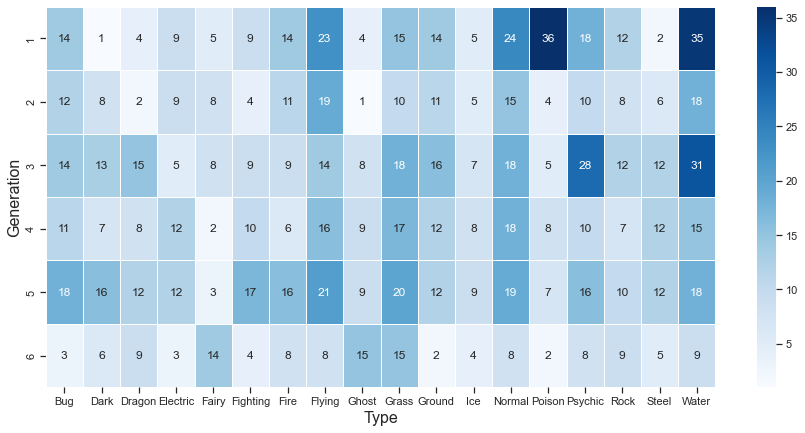

In [46]:
plt.figure(figsize = (15, 7))
sns.heatmap(generation_type.pivot_table(index = "generation", columns = "type", values = "values", aggfunc='count'), \
            annot = True, linewidths = .5, cmap="Blues")
plt.xlabel("Type", fontsize = 16)
plt.ylabel("Generation", fontsize = 16)
plt.show()

Looking at the number of Pokémon belonging to each type by generation, it can be seen that the Flying, Grass, and Normal types are evenly distributed across generations 1 to 6. On the other hand, most of the Poison type Pokemon are distributed in the first generation.

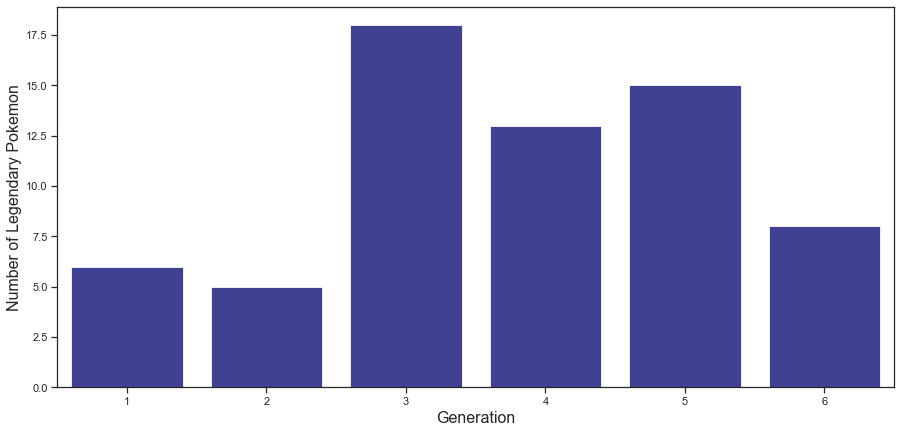

In [47]:
plt.figure(figsize = (15, 7))
sns.barplot(x = "Generation", y = "Count", color = "darkblue", alpha = 0.8, \
            data = df_pokemon[df_pokemon.Legendary == True] \
                   .groupby(["Generation", "Legendary"]).count().Name.sort_values(ascending = False) \
                   .reset_index().rename(columns = {"Name" : "Count"}))
plt.xlabel("Generation", fontsize = 16)
plt.ylabel("Number of Legendary Pokemon", fontsize = 16)
plt.show()

The graph above shows the number of legendary Pokemon per generation. The number of legendary Pokemon was the lowest in Generations 1 and 2, then more than doubled in Generations 3, 4, and 5, and decreased in the 6th generation, conversely.

When comparing abilities by generation, for the same reason as when comparing abilities by type, the analysis proceeds by excluding legendary Pokemon.

In [48]:
df_pokemon_non_legend = df_pokemon[df_pokemon.Legendary == False]

In [49]:
df_pokemon_non_legend["Total_attack"] = df_pokemon_non_legend["Attack"] \
                                        + df_pokemon_non_legend["Sp. Atk"] \
                                        + df_pokemon_non_legend["Speed"]

df_pokemon_non_legend["Total_defense"] = df_pokemon_non_legend["Defense"] \
                                         + df_pokemon_non_legend["Sp. Def"] \
                                         + df_pokemon_non_legend["HP"]

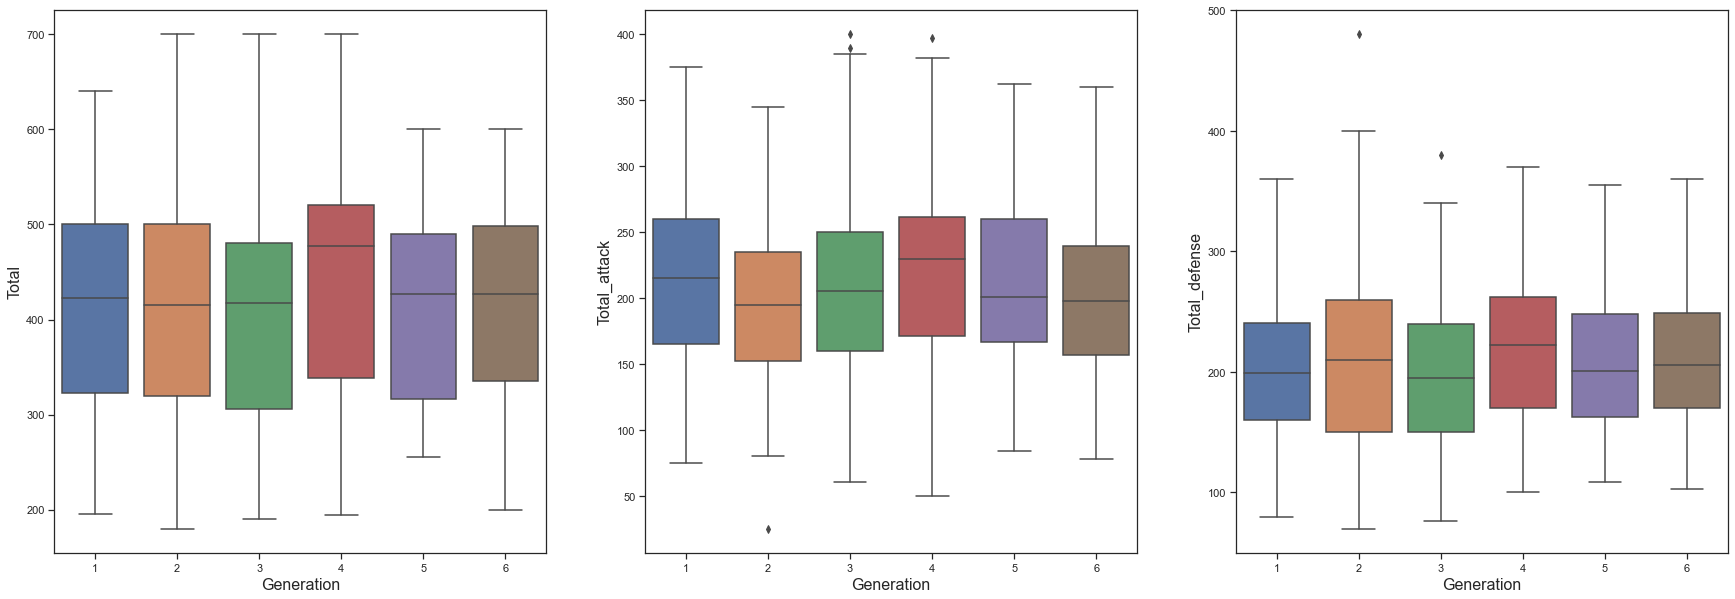

In [50]:
column_list = ["Total", "Total_attack", "Total_defense"]

fig, axes = plt.subplots(1, 3, figsize = (30,10))

for i, column in enumerate(column_list):
    sns.boxplot(ax = axes[i%3], x = "Generation", y = column, data = df_pokemon_non_legend)
    axes[i%3].set_xlabel("Generation", fontsize = 16)
    axes[i%3].set_ylabel(column, fontsize = 16)

As with the analysis by Type, the Tota_attack column was created by combining Attack, Sp.Atk, and Speed, and the Total_defense column was created by combining Defense, Sp.Def, and HP. Afterwards, Total, Total_attack, and Total_defense were compared by Generation. Compared to other generations, the 4th Generation tends to have higher Total_attack and Total_defense abilities, so it seems that the 4th Generation has the highest Total. To check this more precisely, let's proceed with anova analysis.


In [51]:
lm_total = smf.ols("Total ~ Generation", data = df_pokemon_non_legend)
lm_total_res = lm_total.fit()
print(lm_total_res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1754
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.675
Time:                        14:38:35   Log-Likelihood:                -4475.2
No. Observations:                 735   AIC:                             8954.
Df Residuals:                     733   BIC:                             8964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    413.9727      8.684     47.673      0.0

When anova analysis is performed, the F-statistic probability is very high at 0.67. This means that the null hypothesis that there is no significant difference between Generations cannot be rejected, so it can be seen that there is no statistical difference in Total between generations.

In [52]:
tukeyhsd_total = pairwise_tukeyhsd(df_pokemon_non_legend["Total"], df_pokemon_non_legend["Generation"])
tukeyhsd_total.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The above shows the turkeyhsd table for Total between generations. When the reject column is true, it can be interpreted that there is a statistically significant difference between the two groups. However, as can be seen from the table above, there is no pair with a significant difference in Total between generations.

In [53]:
lm_total_attack = smf.ols("Total_attack ~ Generation", data = df_pokemon_non_legend)
lm_total_attack_res = lm_total_attack.fit()
print(lm_total_attack_res.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_attack   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03249
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.857
Time:                        14:42:14   Log-Likelihood:                -4105.9
No. Observations:                 735   AIC:                             8216.
Df Residuals:                     733   BIC:                             8225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    210.4234      5.254     40.053      0.0

In [54]:
tukeyhsd_total_attack = pairwise_tukeyhsd(df_pokemon_non_legend["Total_attack"], df_pokemon_non_legend["Generation"])
tukeyhsd_total_attack.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The same goes for Total_attack ability. There is no statistically significant difference in Total_attack between generations.

In [55]:
lm_total_defense = smf.ols("Total_defense ~ Generation", data = df_pokemon_non_legend)
lm_total_defense_res = lm_total_defense.fit()
print(lm_total_defense_res.summary())

                            OLS Regression Results                            
Dep. Variable:          Total_defense   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8683
Date:                Tue, 15 Feb 2022   Prob (F-statistic):              0.352
Time:                        14:43:28   Log-Likelihood:                -4057.5
No. Observations:                 735   AIC:                             8119.
Df Residuals:                     733   BIC:                             8128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.5493      4.919     41.378      0.0

In [56]:
tukeyhsd_total_defense = pairwise_tukeyhsd(df_pokemon_non_legend["Total_defense"], df_pokemon_non_legend["Generation"])
tukeyhsd_total_defense.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

The same goes for Total_defense. There is no statistically significant difference in Total_defense between generations.

When comparing the Total, Total_attack, and Total_defense by generation, there was no statistically significant difference by generation. Next, let's compare the detailed 6 abilities.

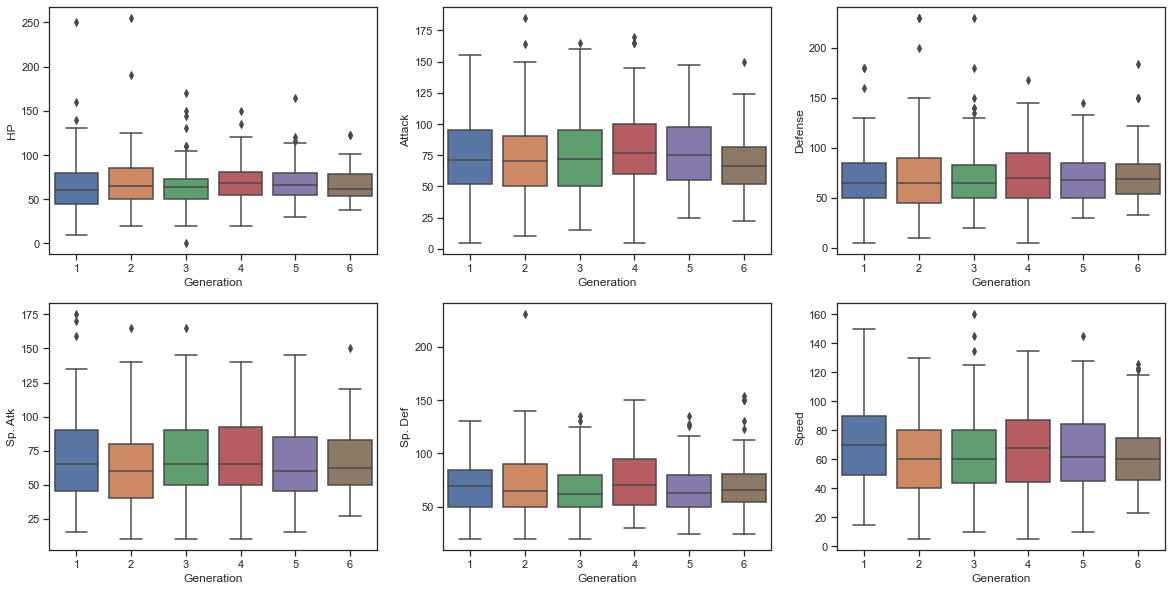

In [57]:
column_list = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

fig, axes = plt.subplots(2, 3, figsize = (20,10))

for i, column in enumerate(column_list):
    sns.boxplot(ax = axes[i//3 ,i%3], x = "Generation", y = column, data = df_pokemon_non_legend)

When comparing other detailed abilities, there was little difference by generation. Therefore, it can be seen that there is no significant difference in the abilities of Pokemon by generation.

Next, let's check if there is a distributional difference even if there is no numerical difference in ability values.

<Figure size 1440x1440 with 0 Axes>

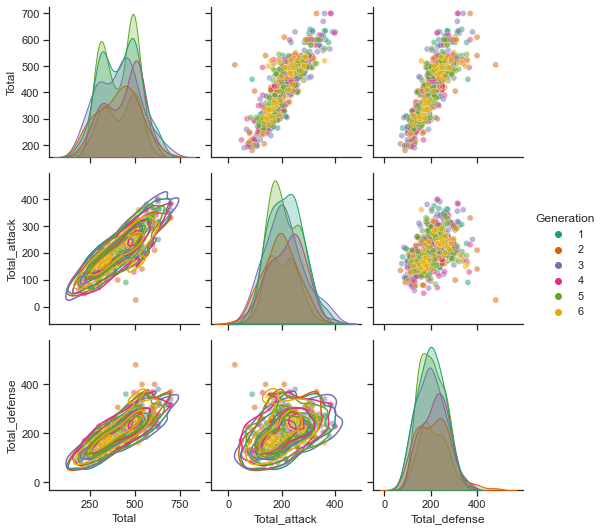

In [58]:
plt.figure(figsize = (20, 20))

g = sns.pairplot(data = df_pokemon_non_legend, vars = ["Total", "Total_attack", "Total_defense"], \
                 plot_kws = {'alpha': 0.5}, hue = "Generation", palette = 'Dark2')
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

First, let's compare the distribution of Total, Total_attack, and Total_defense ability by generation. There are 6 generations, so it is difficult to compare, but if you look at the histogram in diagnor, you can see that there is almost no difference in the histogram for each generation.

<Figure size 1440x1440 with 0 Axes>

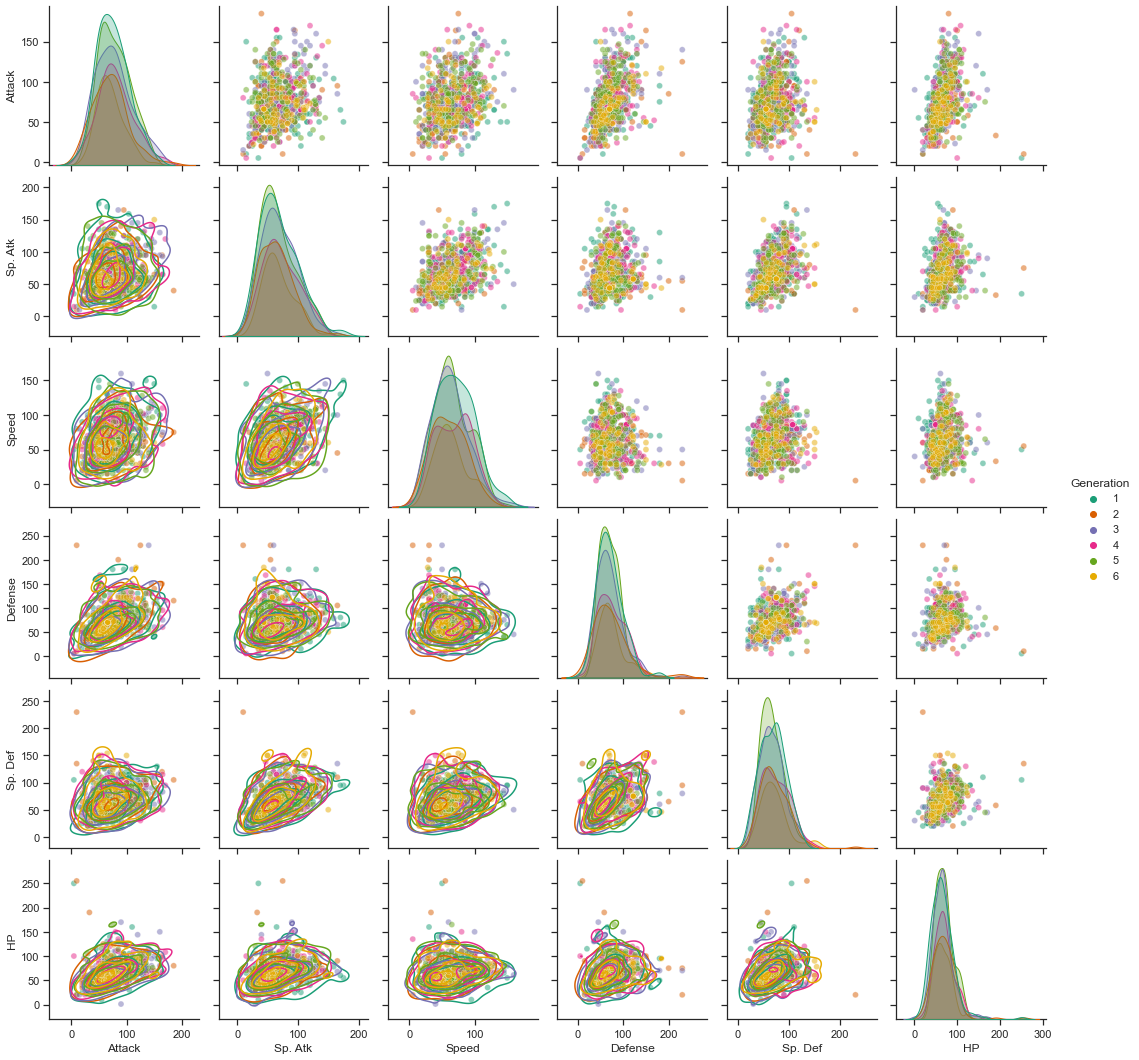

In [59]:
plt.figure(figsize = (20, 20))

g = sns.pairplot(data = df_pokemon_non_legend, vars = ["Attack", "Sp. Atk", "Speed", "Defense", "Sp. Def", "HP"], \
                 plot_kws = {'alpha': 0.5}, hue = "Generation", palette = 'Dark2')
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

Next, even if we compare the numerical values ​​of more detailed ability values, it is difficult to confirm the difference in the distribution by generation.

In other words, although the number of legend Pokemon and the distribution of Pokemon types are different for each generation, there is no difference in the distribution of detailed stats or numerical differences.